In [22]:
from msitrees.tree import MSIDecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
import time







In [23]:
from chefboost import Chefboost as chef
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer



# Breast_cancer dataset

In [24]:
cancer = load_breast_cancer()
data = np.c_[cancer.data, cancer.target]
columns = np.append(cancer.feature_names, ["target"])
df_breast_cancer = pd.DataFrame(data, columns=columns)
df_breast_cancer['target'] = df_breast_cancer.target.replace(to_replace=[0, 1], value=['Benign', 'Malignant'])


df_breast_cancer.iloc[:,1:32]

,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,Benign
1,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,Benign
2,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,Benign
3,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,Benign
4,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign


In [25]:
len(df_breast_cancer)

569

In [26]:
df_breast_cancer.to_csv('breast_cancer.csv', encoding='utf-8')

In [27]:
df_breast_cancer = df_breast_cancer.rename(columns={'target': 'Decision'})
train, test = df_breast_cancer[:int(0.8*len(df_breast_cancer))], df_breast_cancer[int(len(df_breast_cancer) *0.8):]
len(train), len(test)

(455, 114)

In [28]:
algorithms = ['ID3', 'C4.5', 'CART', 'CHAID']

In [29]:
pd.options.mode.chained_assignment = None
for algorithm in algorithms:
    config = {'algorithm': algorithm}
    model = chef.fit(train, config = config)
    good = 0
    for value in test.values:
        prediction = chef.predict(model, param=value[:~0])
        if prediction == value[~0]:
            good += 1
    accuracy = good/len(test)
    print(f"Accuracy for {algorithm} = {accuracy}")
    


ID3  tree is going to be built...
-------------------------
finished in  25.27924871444702  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  100.0 % on  455  instances
Labels:  ['Benign' 'Malignant']
Confusion matrix:  [[186, 0], [0, 269]]
Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Accuracy for ID3 = 0.8947368421052632
C4.5  tree is going to be built...
-------------------------
finished in  28.482030868530273  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  100.0 % on  455  instances
Labels:  ['Benign' 'Malignant']
Confusion matrix:  [[186, 0], [0, 269]]
Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Accuracy for C4.5 = 0.8508771929824561
CART  tree is going to be built...
-------------------------
finished in  26.20069694519043  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  100.0 % on  455  instances
Labels:  ['Benign' 'Malignant']
Confusion 

In [30]:
from sklearn.model_selection import train_test_split
x_train_breast, x_test_breast, y_train_breast, y_test_breast = train_test_split(df_breast_cancer.drop(['Decision'], axis=1), df_breast_cancer["Decision"], test_size=0.20)

In [31]:
from sklearn.tree import DecisionTreeClassifier 
start=time.time()
dec_tree = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_tree = dec_tree.fit(x_train_breast, y_train_breast)
y_pred_breast_dec = model_tree.predict(x_test_breast)
total_time=time.time()-start
print("DecisionTree Classifier Model Accuracy for gini criterion:", accuracy_score(y_test_breast, y_pred_breast_dec))

print(f"time: {total_time}")

DecisionTree Classifier Model Accuracy for gini criterion: 0.9385964912280702
time: 0.011968374252319336


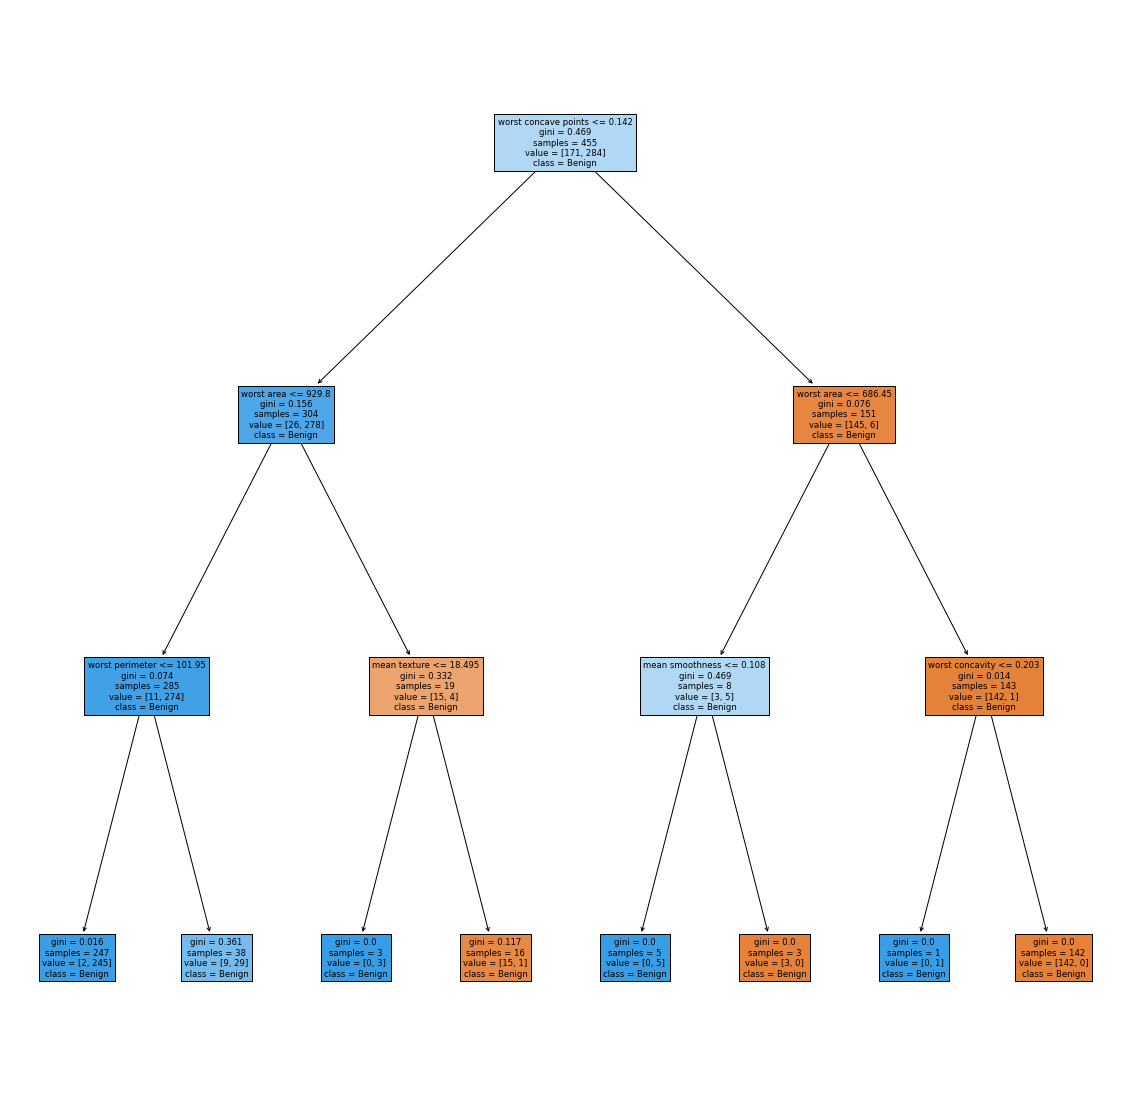

In [32]:
fig = plt.figure(figsize=(20,20))
tree.plot_tree(dec_tree, feature_names=df_breast_cancer.columns[:-1],  
                   class_names=df_breast_cancer.iloc[:, -1].values,
                   filled=True)

fig.savefig("decistion_tree_breast_gini.png")

In [33]:
start=time.time()

dec_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model_tree = dec_tree.fit(x_train_breast, y_train_breast)
y_pred_breast_dec = model_tree.predict(x_test_breast)
total_time=time.time()-start
print("DecisionTree Classifier Model Accuracy for entropy criterion:", accuracy_score(y_test_breast, y_pred_breast_dec))
print(f"time: {total_time}")

DecisionTree Classifier Model Accuracy for entropy criterion: 0.8947368421052632
time: 0.0


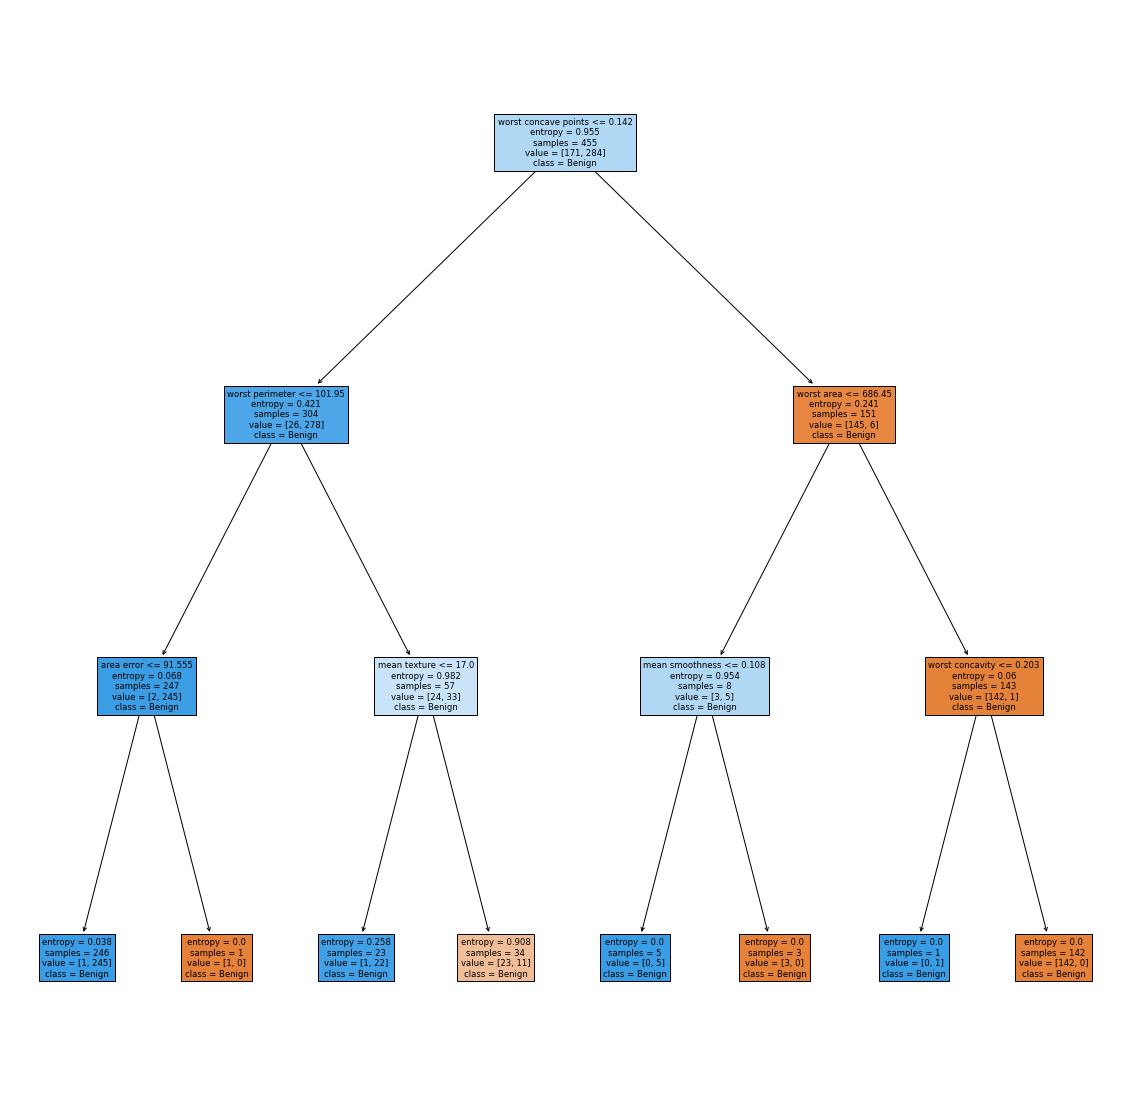

In [34]:
fig = plt.figure(figsize=(20,20))
tree.plot_tree(dec_tree, feature_names=df_breast_cancer.columns[:-1],  
                   class_names=df_breast_cancer.iloc[:, -1].values,
                   filled=True)
fig.savefig("decistion_tree_breast_entorpy.png")

In [35]:
from sklearn.ensemble import RandomForestClassifier
start=time.time()
clf_cancer=RandomForestClassifier(max_depth=3, n_estimators=100)
clf_cancer.fit(x_train_breast,y_train_breast)
y_pred_cancer=clf_cancer.predict(x_test_breast)
total_time=time.time()-start
print("Accuracy for RandomForestClassifier:", accuracy_score(y_test_breast, y_pred_cancer))


print(f"time: {total_time}")

Accuracy for RandomForestClassifier: 0.9473684210526315
time: 0.19472002983093262


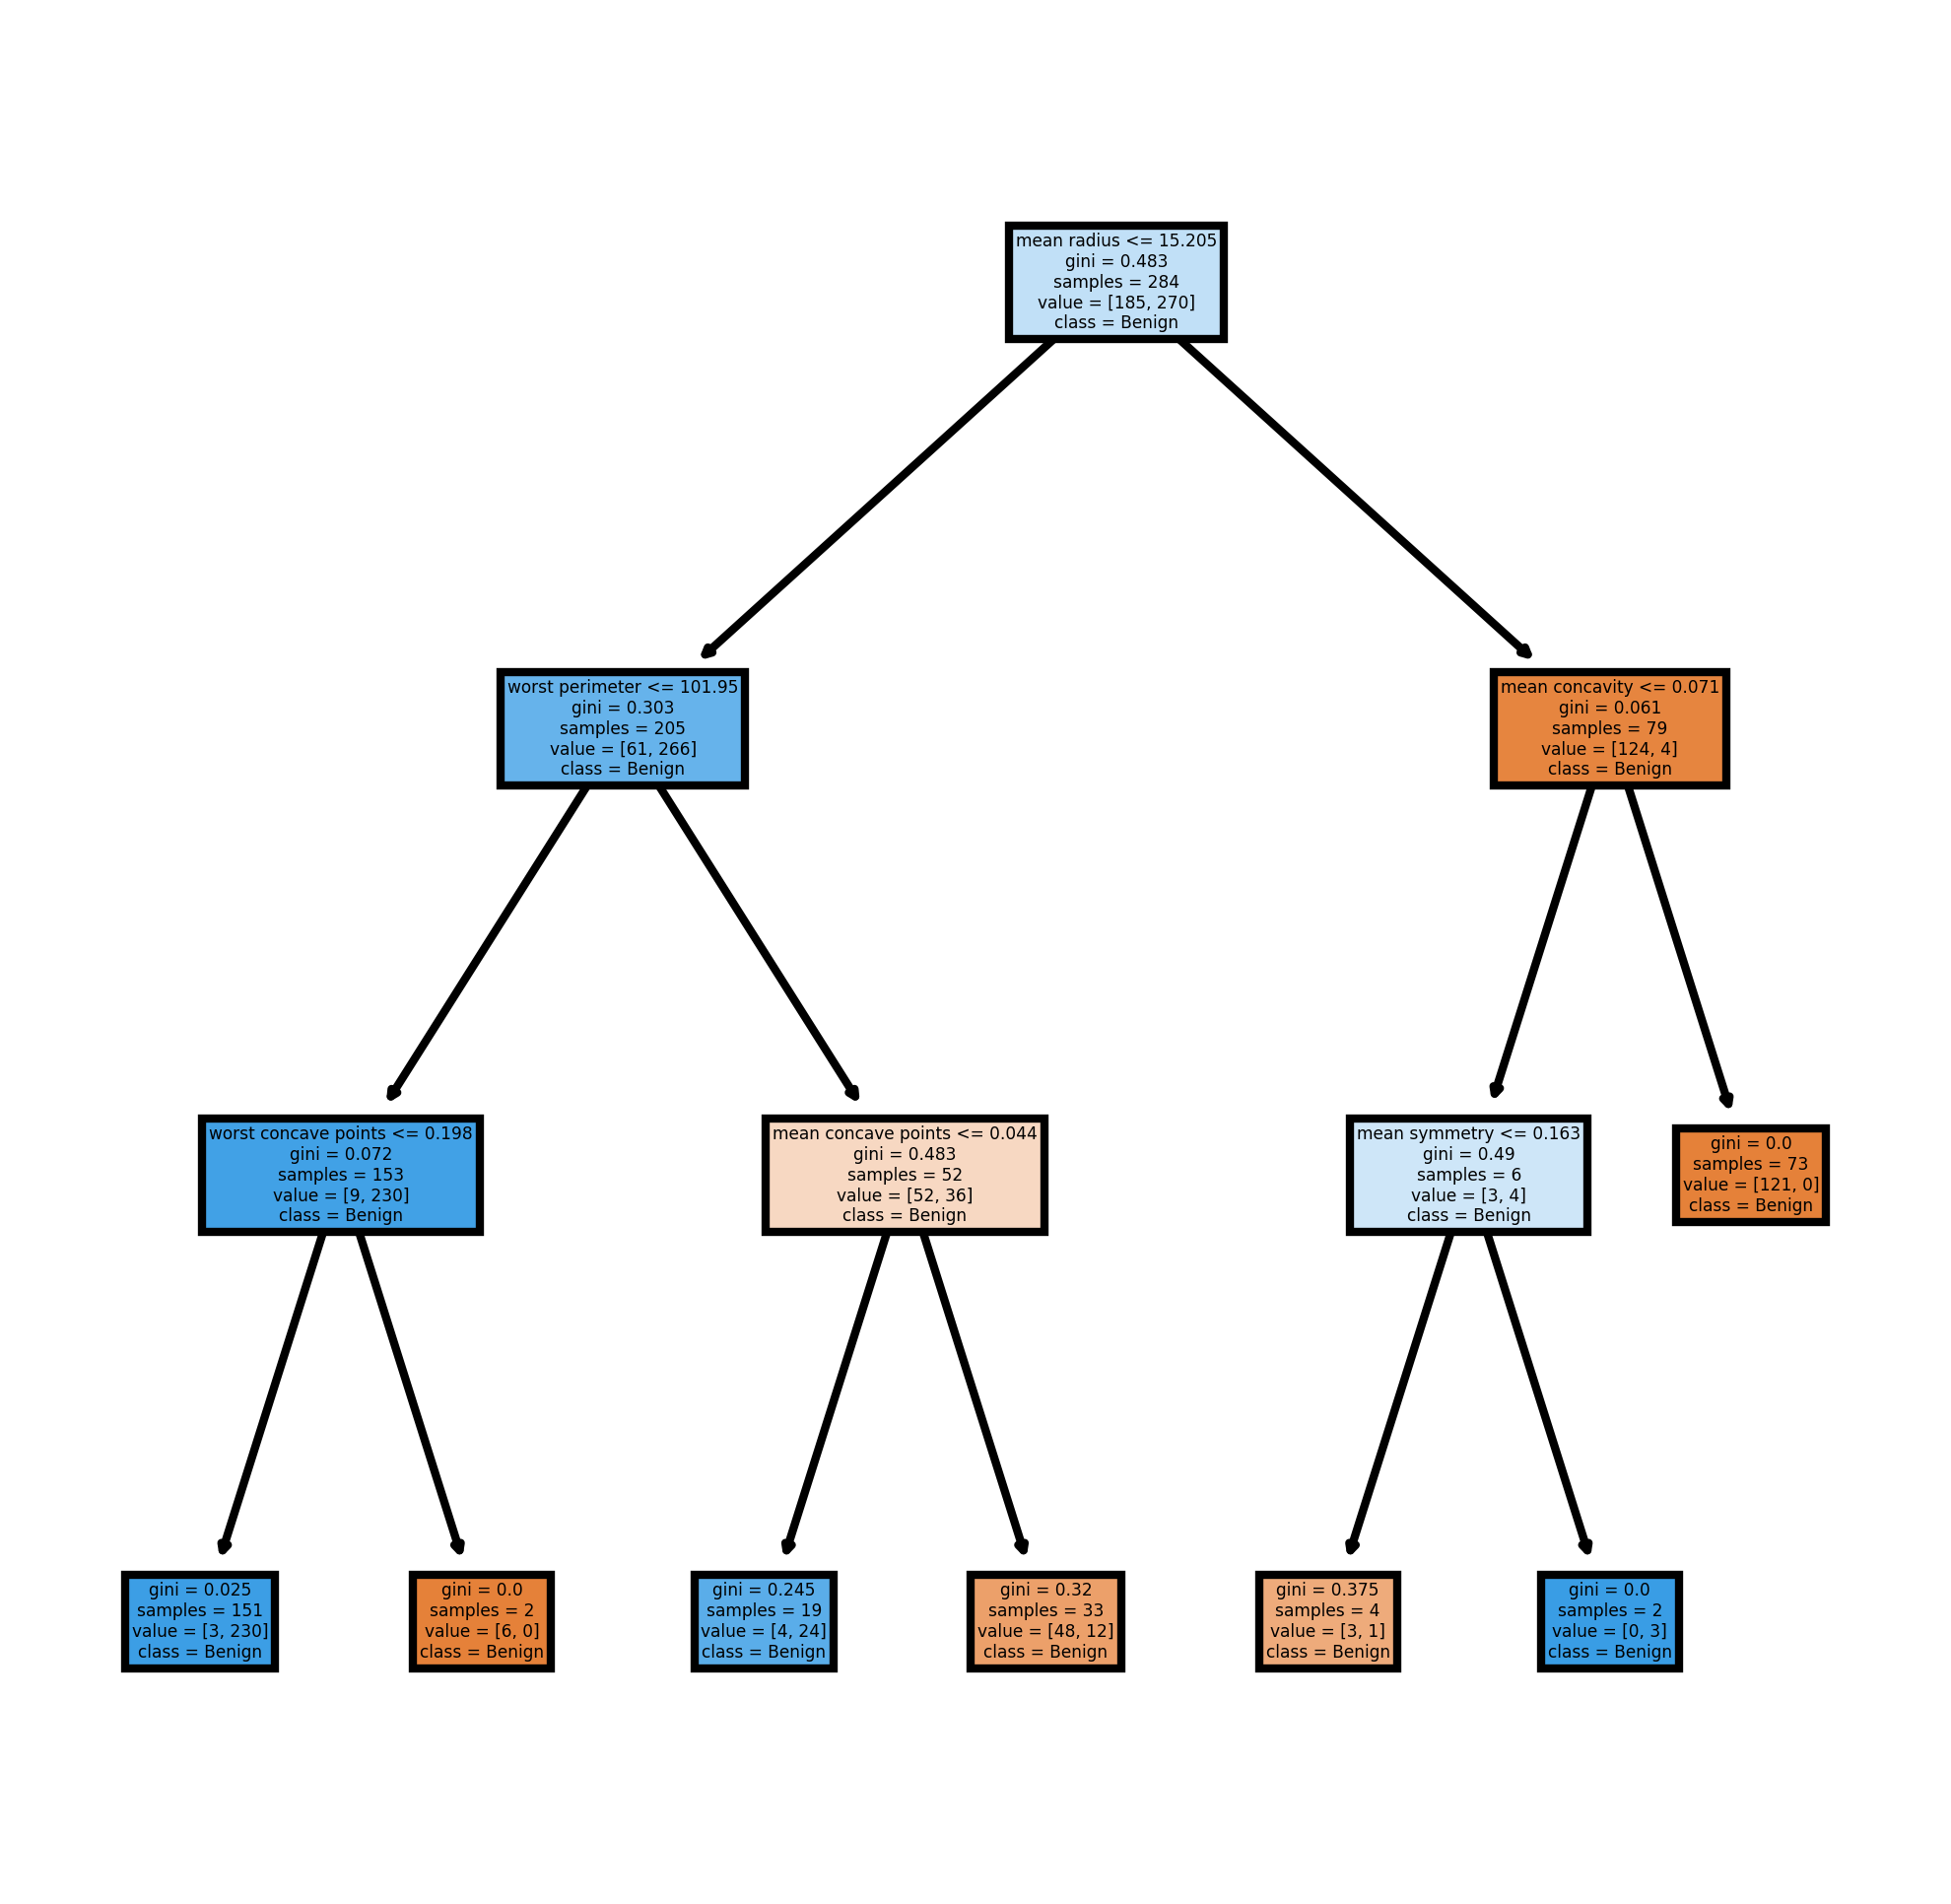

In [36]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=600)
tree.plot_tree(clf_cancer.estimators_[3],
               feature_names = df_breast_cancer.columns[:-1].values, 
               class_names=df_breast_cancer.iloc[:, -1].values,
               filled = True);
fig.savefig('breast_cancer_individualtree.png')

In [37]:
start=time.time()
adb = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)
model_adb = adb.fit(x_train_breast, y_train_breast)
y_pred_breast= model_adb.predict(x_test_breast)
total_time = time.time()-start
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test_breast, y_pred_breast))
print(total_time)

AdaBoost Classifier Model Accuracy: 0.9649122807017544
0.16055989265441895


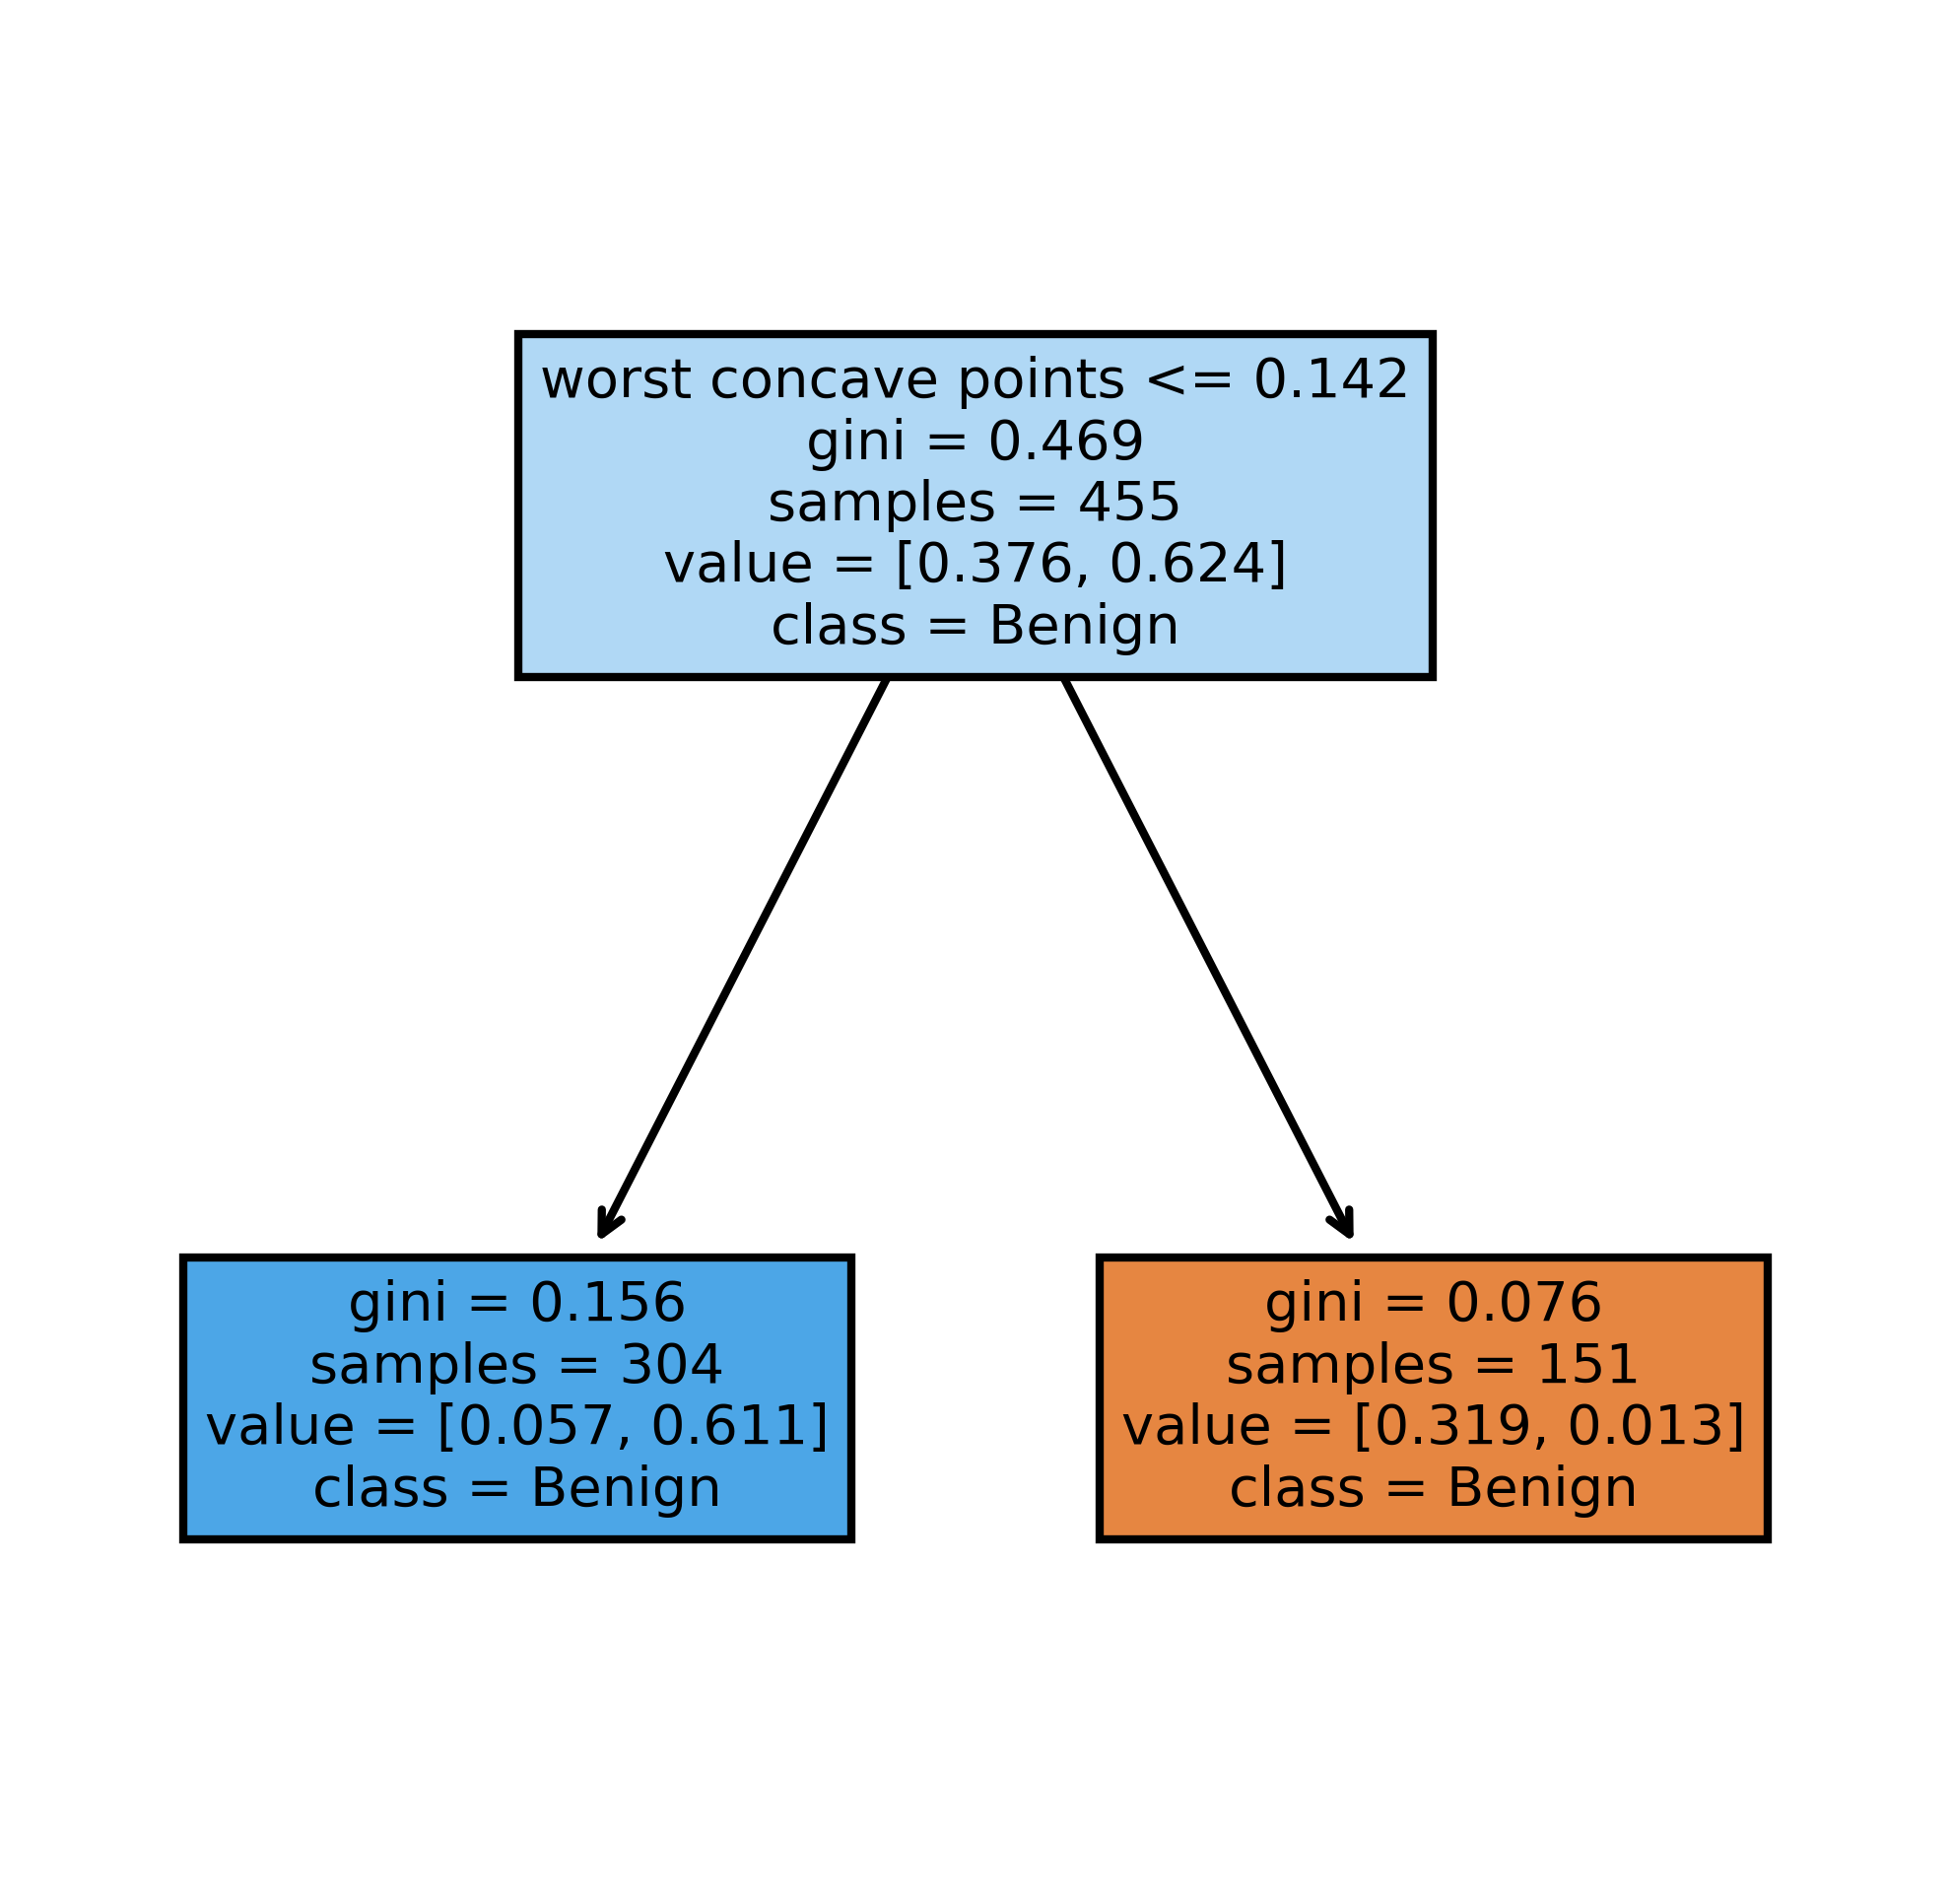

In [38]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=600)
tree.plot_tree(model_adb.estimators_[0],
               feature_names = df_breast_cancer.columns[:-1].values, 
               class_names=df_breast_cancer.iloc[:, -1].values,
               filled = True);
fig.savefig('breast_ada_individualtree.png')

In [39]:
df_breast_cancer.Decision[df_breast_cancer.Decision == 'Benign'] = 0
df_breast_cancer.Decision[df_breast_cancer.Decision == 'Malignant'] = 1

df_breast_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Decision
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [40]:
from sklearn.model_selection import train_test_split
x_train_breast, x_test_breast, y_train_breast, y_test_breast = train_test_split(df_breast_cancer.drop(['Decision'], axis=1), df_breast_cancer["Decision"], test_size=0.20)

In [41]:
len(x_train_breast), len(x_test_breast)
x_train_breast = x_train_breast.astype(float)
x_test_breast = x_test_breast.astype(float)
y_train_breast = y_train_breast.astype(float)
y_test_breast = y_test_breast.astype(float)

In [42]:
start=time.time()
clf = MSIDecisionTreeClassifier()
clf.fit(x_train_breast, y_train_breast)
clf.predict(x_test_breast)
total_time=time.time()-start
print(total_time)



4.001795768737793


In [43]:
sum(clf.predict(x_test_breast) == y_test_breast.values)/len(y_test_breast)

0.9298245614035088

# Titanic dataset


In [44]:
titanic = pd.read_csv('titanic_train.csv')
titanic['Survived'] = titanic['Survived'].replace([0, 1], ['Died', 'Survived'])
titanic = titanic.rename(columns={'Survived': 'Decision'})
columns_titles = ["PassengerId","Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Ticket","Fare", "Cabin" ,"Embarked", "Decision"]
titanic=titanic.reindex(columns=columns_titles)


titanic

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Decision
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Died
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Survived
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Survived
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Survived
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Died
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Died
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Survived
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Died
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Survived


In [45]:
titanic.to_csv('TITANIC.csv', encoding='utf-8')

In [46]:
titanic.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Decision         0
dtype: int64

In [47]:
titanic = titanic.dropna().reset_index(drop=True)
titanic.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Decision       0
dtype: int64

In [48]:
titanic

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Decision
0,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Survived
1,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Survived
2,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Died
3,11,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Survived
4,12,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Survived
...,...,...,...,...,...,...,...,...,...,...,...,...
178,872,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,Survived
179,873,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,Died
180,880,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,Survived
181,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Survived


In [49]:
titanic['Age'] = titanic['Age'].astype(str)
titanic['Cabin'] = titanic['Cabin'].astype(str)
len(titanic)

183

In [50]:
from sklearn.model_selection import train_test_split
x_train_tit, x_test_tit, y_train, y_test = train_test_split(titanic.drop(['Decision'], axis=1), titanic["Decision"], test_size=0.20)

In [51]:
train_tit = pd.concat([x_train_tit, y_train], axis=1, join='inner')
test_tit = pd.concat([x_test_tit, y_test], axis=1, join='inner')


In [52]:
for algorithm in algorithms:
    config = {'algorithm': algorithm}
    model = chef.fit(train_tit, config = config)
    good = 0
    for value in test_tit.values:
        prediction = chef.predict(model, param=value[:~0])
        if prediction == value[~0]:
            good += 1
    accuracy = good/len(test_tit)
    print(f"Accuracy for {algorithm} = {accuracy}")

ID3  tree is going to be built...
-------------------------
finished in  13.173095941543579  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  100.0 % on  146  instances
Labels:  ['Survived' 'Died']
Confusion matrix:  [[99, 0], [0, 47]]
Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Accuracy for ID3 = 0.6486486486486487
C4.5  tree is going to be built...
-------------------------
finished in  8.714765310287476  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  100.0 % on  146  instances
Labels:  ['Survived' 'Died']
Confusion matrix:  [[99, 0], [0, 47]]
Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Accuracy for C4.5 = 0.6756756756756757
CART  tree is going to be built...
-------------------------
finished in  7.867945671081543  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  100.0 % on  146  instances
Labels:  ['Survived' 'Died']
Confusion matrix:  [[99

In [53]:
x_train_tit_numeric = x_train_tit.copy()

In [54]:
x_train_tit_numeric = x_train_tit_numeric.drop(['Name'], axis=1)

In [55]:
x_train_tit_numeric = x_train_tit_numeric.drop(['Ticket'], axis=1)

In [56]:
x_train_tit_numeric = x_train_tit_numeric.drop(['Cabin'], axis=1)

In [57]:
x_train_tit_numeric = x_train_tit_numeric.drop(['Embarked'], axis=1)

In [58]:
x_train_tit_numeric.Sex[x_train_tit_numeric.Sex == 'male'] = 1
x_train_tit_numeric.Sex[x_train_tit_numeric.Sex == 'female'] = 2

In [59]:
x_train_tit_numeric['Age'] = x_train_tit_numeric['Age'].astype(float)

In [60]:
np.argmin(x_train_tit_numeric.applymap(np.isreal).all(1))

0

In [61]:
x_train_tit_numeric.applymap(np.isreal).all(1)

182    True
51     True
17     True
103    True
85     True
       ... 
58     True
166    True
113    True
167    True
44     True
Length: 146, dtype: bool

In [62]:
x_train_tit_numeric

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
182,890,1,1,26.0,0,0,30.0000
51,292,1,2,19.0,1,0,91.0792
17,103,1,1,21.0,0,1,77.2875
103,513,1,1,36.0,0,0,26.2875
85,436,1,2,14.0,1,2,120.0000
...,...,...,...,...,...,...,...
58,311,1,2,24.0,0,0,83.1583
166,790,1,1,46.0,0,0,79.2000
113,557,1,2,48.0,1,0,39.6000
167,797,1,2,49.0,0,0,25.9292


In [63]:
x_train_tit_numeric.Sex[x_train_tit_numeric.Sex == 'male'] = 1
x_train_tit_numeric.Sex[x_train_tit_numeric.Sex == 'female'] = 2

In [64]:
y_train_numeric = y_train.to_frame()


In [65]:
y_train_numeric.Decision[y_train_numeric.Decision == 'Died'] = 0
y_train_numeric.Decision[y_train_numeric.Decision == 'Survived'] = 1

In [66]:
y_train_numeric

,Decision
182,1
51,1
17,0
103,1
85,1
...,...
58,1
166,0
113,1
167,1


#tutaj

In [67]:
titanic = pd.read_csv('titanic_train.csv')
titanic.drop(['Name'], 1, inplace=True)
titanic.fillna(0, inplace=True)
titanic['Survived'] = titanic['Survived'].replace([0, 1], ['Died', 'Survived'])
titanic = titanic.rename(columns={'Survived': 'Decision'})
columns_titles = ["PassengerId","Pclass", "Sex", "Age", "SibSp", "Parch", "Ticket","Fare", "Cabin" ,"Embarked", "Decision"]
titanic=titanic.reindex(columns=columns_titles)

In [68]:
columns = titanic.columns[:-1].values
import numpy as np
for column in columns:
    if titanic[column].dtype != np.int64 and titanic[column].dtype != np.float64:
        titanic[column] = pd.factorize(titanic[column])[0]

In [69]:
titanic

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Decision
0,1,3,0,22.0,1,0,0,7.2500,0,0,Died
1,2,1,1,38.0,1,0,1,71.2833,1,1,Survived
2,3,3,1,26.0,0,0,2,7.9250,0,0,Survived
3,4,1,1,35.0,1,0,3,53.1000,2,0,Survived
4,5,3,0,35.0,0,0,4,8.0500,0,0,Died
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,0,27.0,0,0,677,13.0000,0,0,Died
887,888,1,1,19.0,0,0,678,30.0000,146,0,Survived
888,889,3,1,0.0,1,2,614,23.4500,0,0,Died
889,890,1,0,26.0,0,0,679,30.0000,147,1,Survived


In [70]:
from sklearn.model_selection import train_test_split
x_train_tit, x_test_tit, y_train, y_test = train_test_split(titanic.drop(['Decision'], axis=1), titanic["Decision"], test_size=0.20)

In [71]:
from sklearn.tree import DecisionTreeClassifier
start=time.time()
dec_tree = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_tree = dec_tree.fit(x_train_tit, y_train)
y_pred_tit_dec = model_tree.predict(x_test_tit)
total_time = time.time()-start
print("DecisionTree Classifier Model Accuracy for gini criterion:", accuracy_score(y_test, y_pred_tit_dec))
print(total_time)

DecisionTree Classifier Model Accuracy for gini criterion: 0.8324022346368715
0.010042667388916016


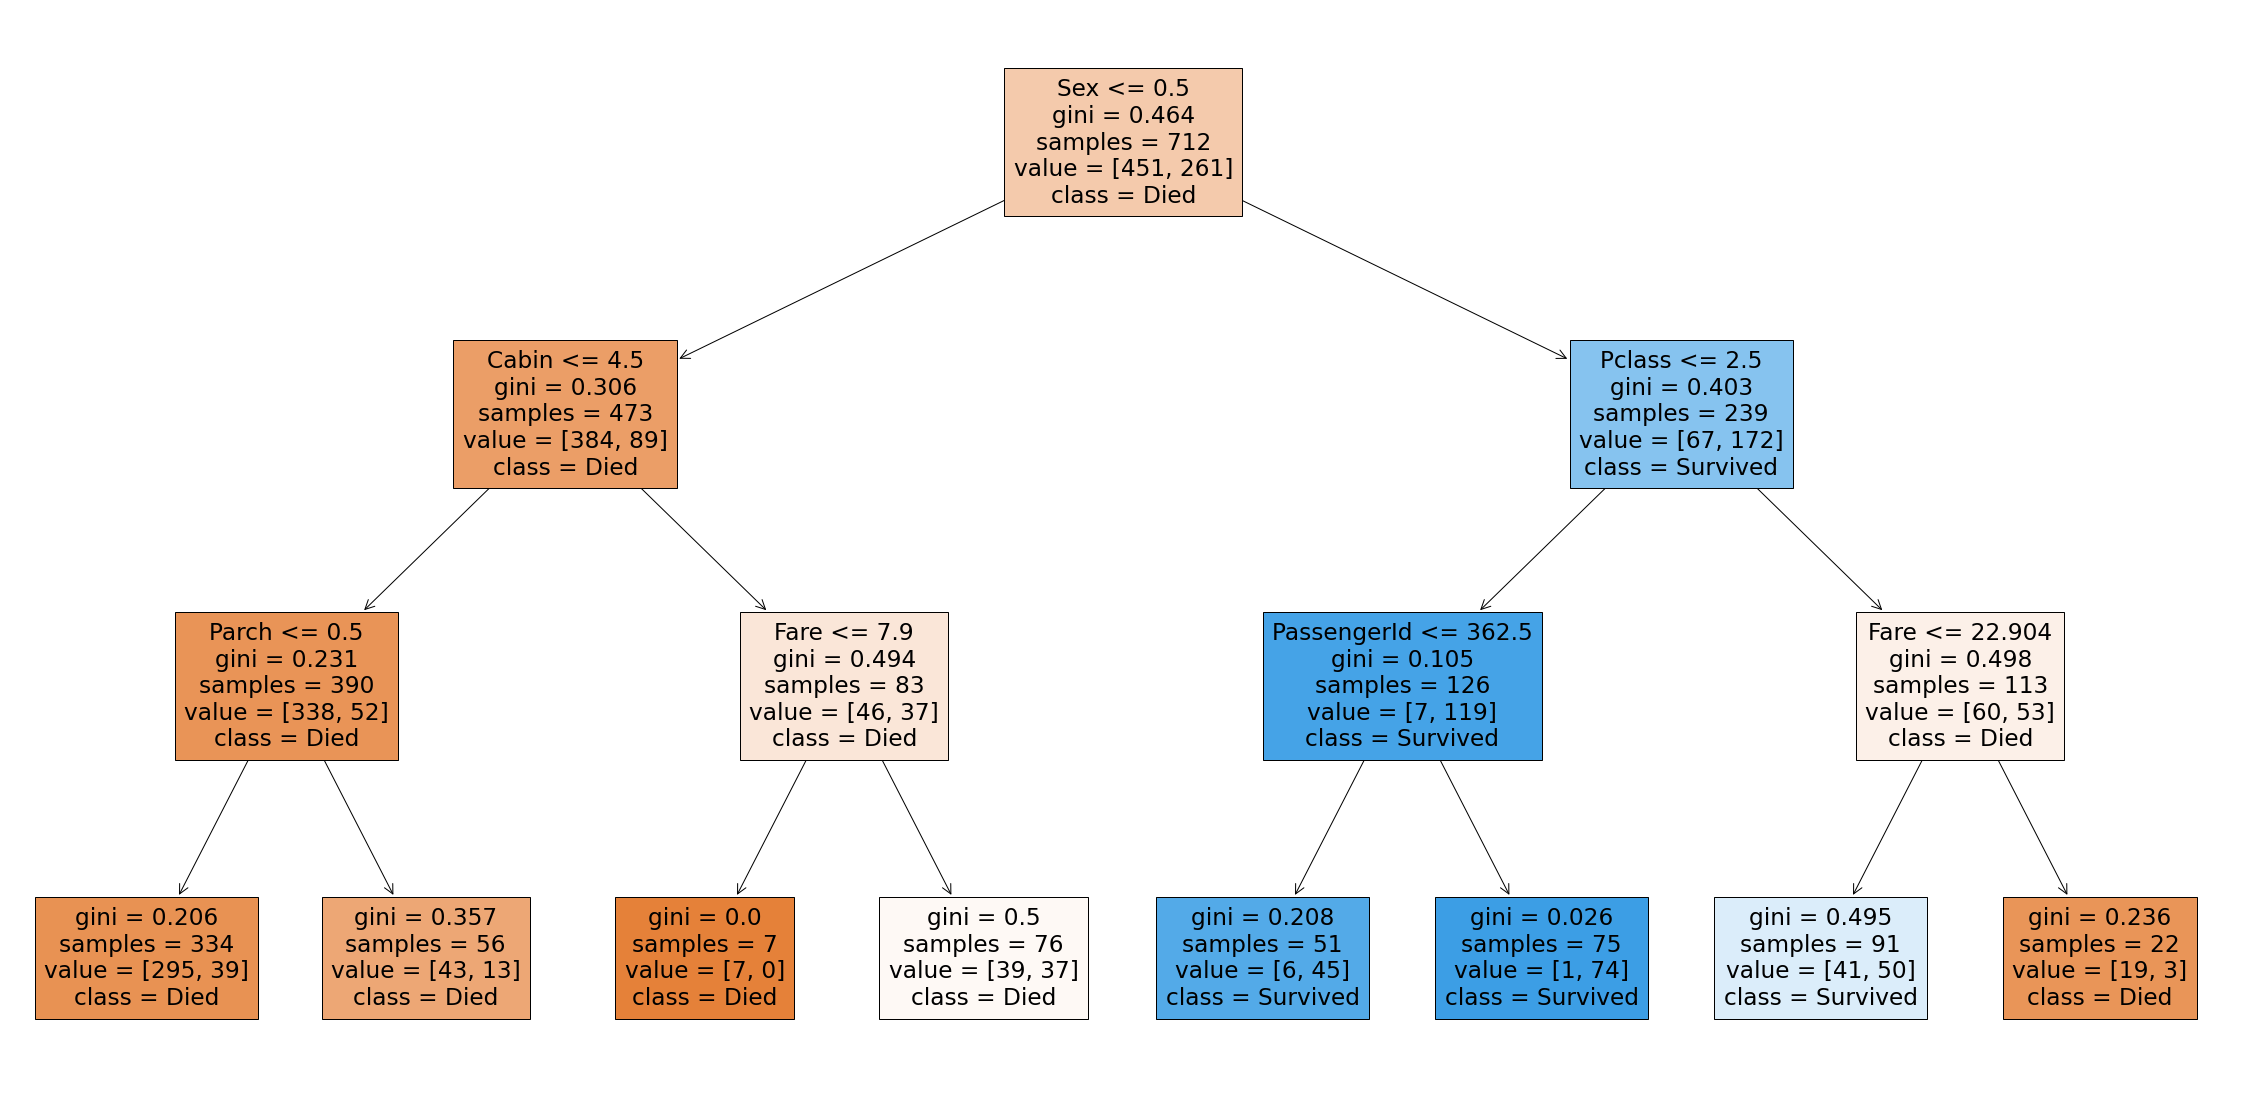

In [72]:
fig = plt.figure(figsize=(40,20))
tree.plot_tree(dec_tree, feature_names=titanic.columns[:-1].values,  
                   class_names=titanic.iloc[:, -1].values,
                   filled=True)
fig.savefig("decistion_tree_titanic_gini.png")

In [73]:
start=time.time()
dec_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model_tree = dec_tree.fit(x_train_tit, y_train)
y_pred_tit_dec = model_tree.predict(x_test_tit)
total_time = time.time() -start
print("DecisionTree Classifier Model Accuracy for entropy criterion:", accuracy_score(y_test, y_pred_tit_dec))
print(total_time)

DecisionTree Classifier Model Accuracy for entropy criterion: 0.8324022346368715
0.011969804763793945


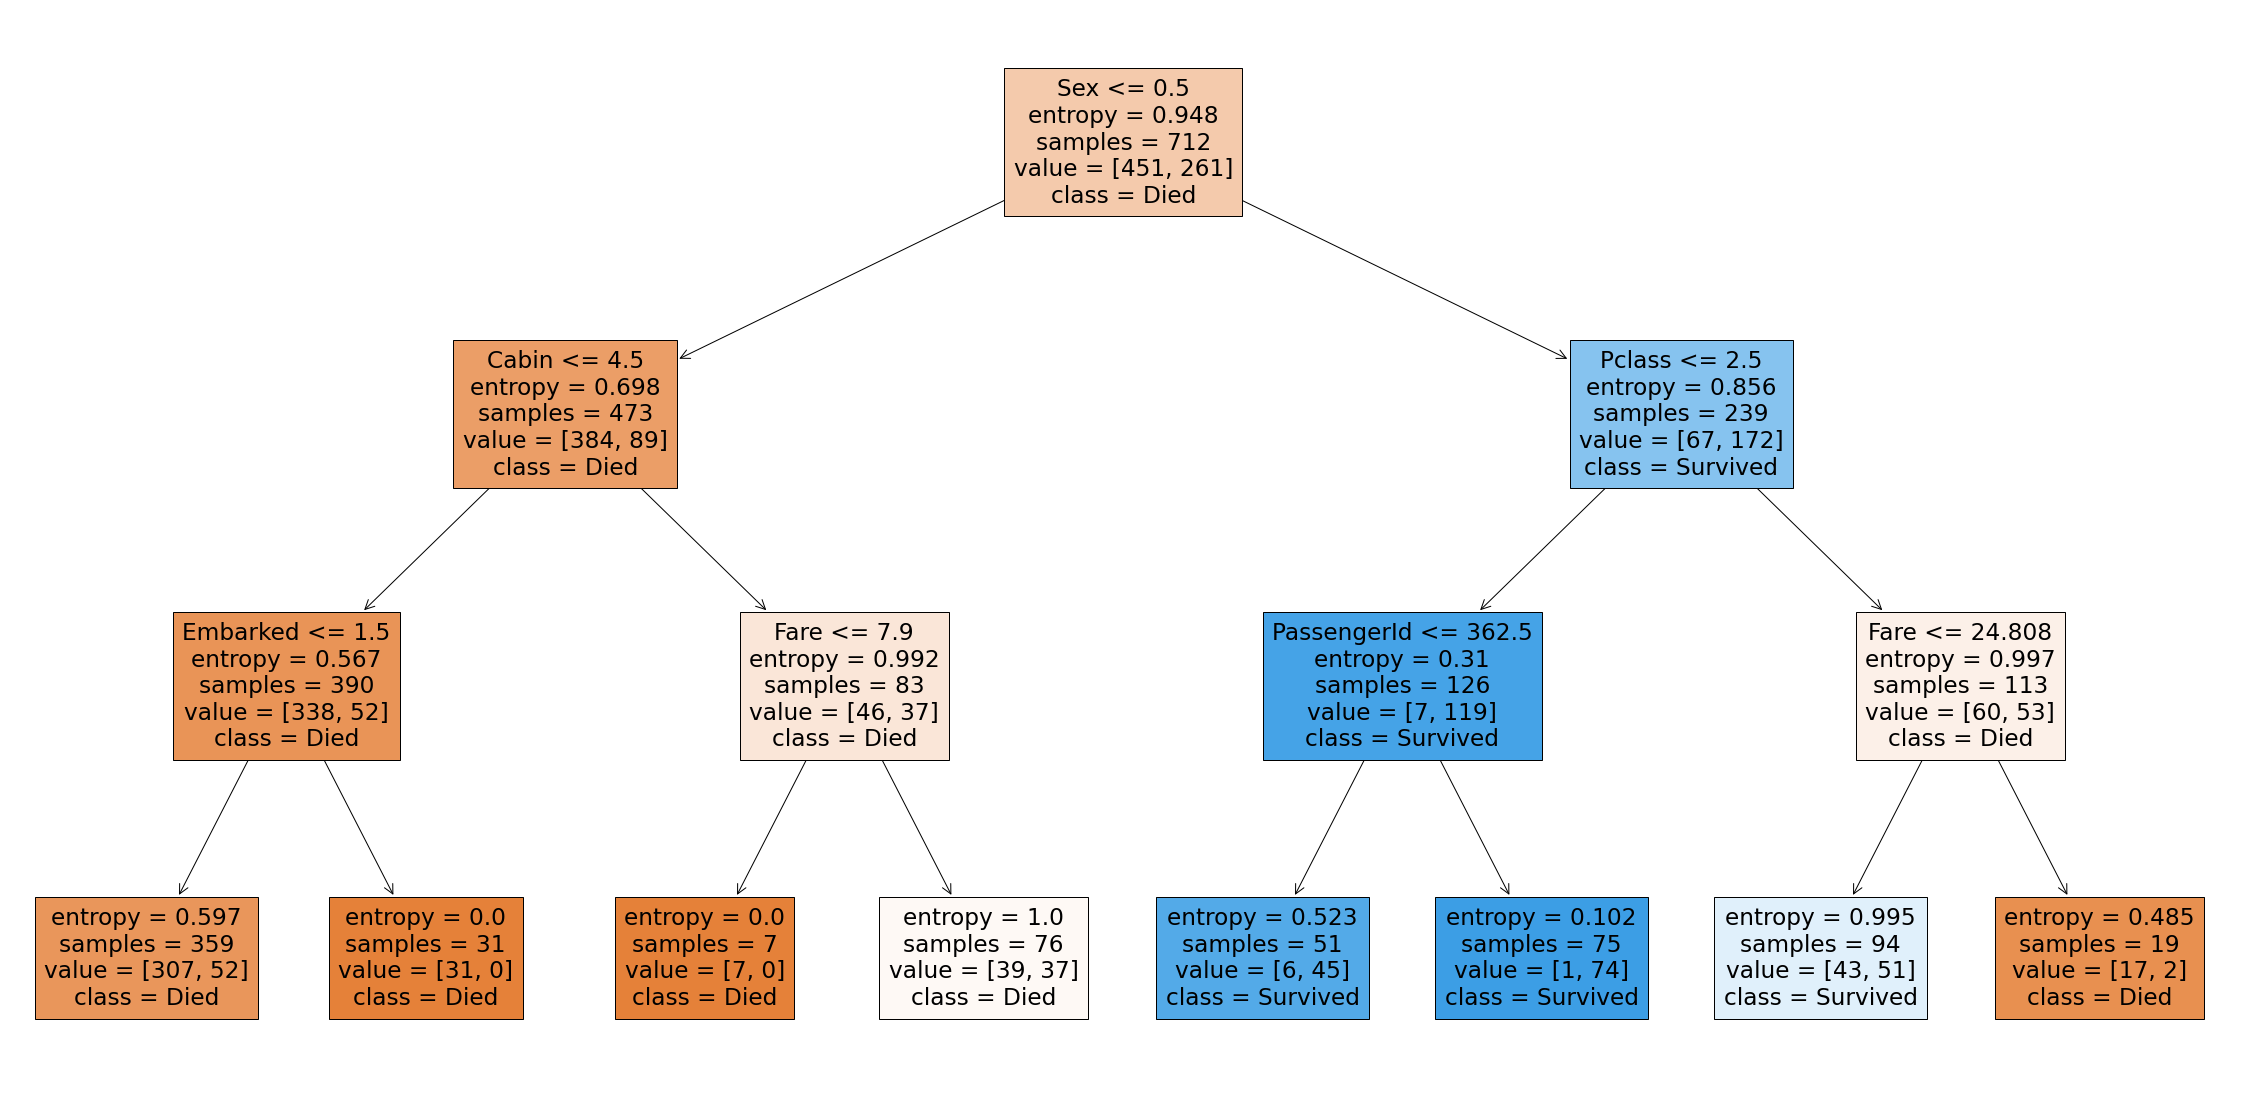

In [74]:
fig = plt.figure(figsize=(40,20))
tree.plot_tree(dec_tree, feature_names=titanic.columns[:-1].values,  
                   class_names=titanic.iloc[:, -1].values,
                   filled=True)
fig.savefig("decistion_tree_titanic_entropy.png")

In [75]:
start=time.time()
clf_titanic=RandomForestClassifier(max_depth=3,n_estimators=100)
clf_titanic.fit(x_train_tit,y_train)
y_pred_titanic=clf_titanic.predict(x_test_tit)
total_time = time.time() - start
print("Accuracy for RandomForestClassifier:", accuracy_score(y_test, y_pred_titanic))
print(total_time)


Accuracy for RandomForestClassifier: 0.7597765363128491
0.3709595203399658


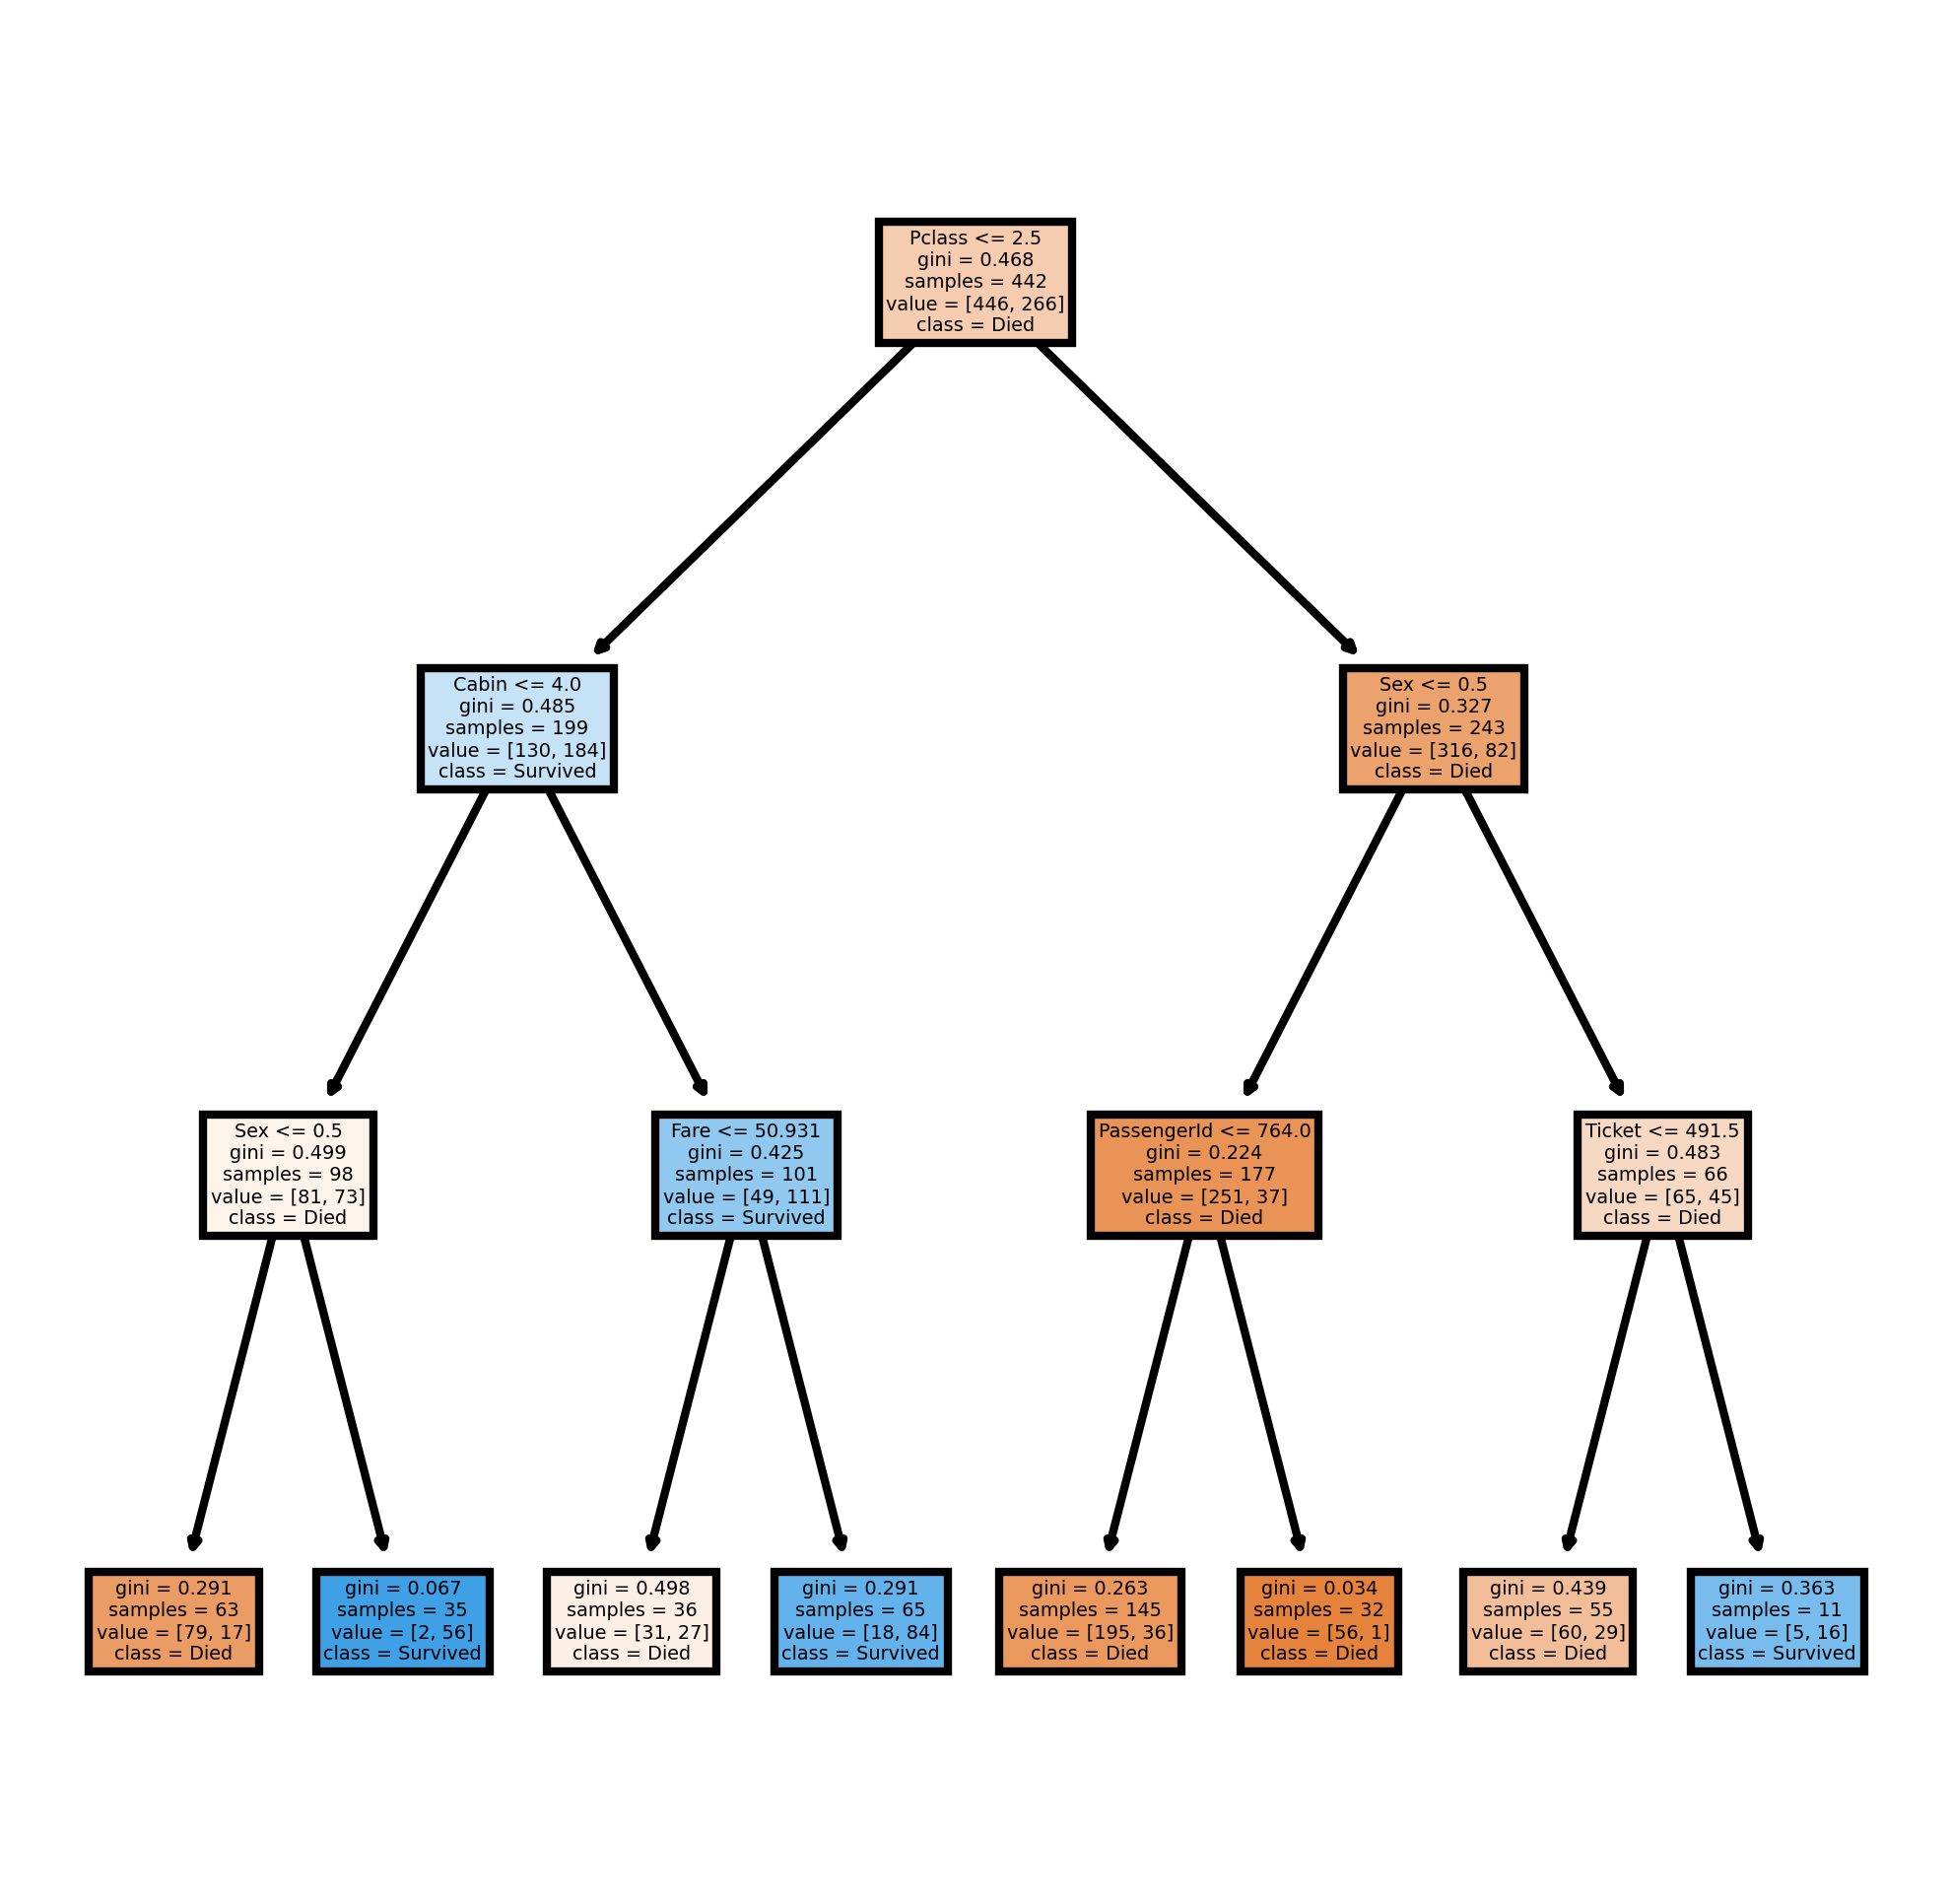

In [76]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=600)
tree.plot_tree(clf_titanic.estimators_[3],
               feature_names = titanic.columns[:-1].values, 
               class_names=titanic.iloc[:, -1].values,
               filled = True);
fig.savefig('titanic_individualtree.png')

In [77]:
start=time.time()
adb = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)
model_adb = adb.fit(x_train_tit, y_train)
y_pred_tit= model_adb.predict(x_test_tit)
total_time=time.time()-start
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred_tit))
print(total_time)

AdaBoost Classifier Model Accuracy: 0.8044692737430168
0.3235437870025635


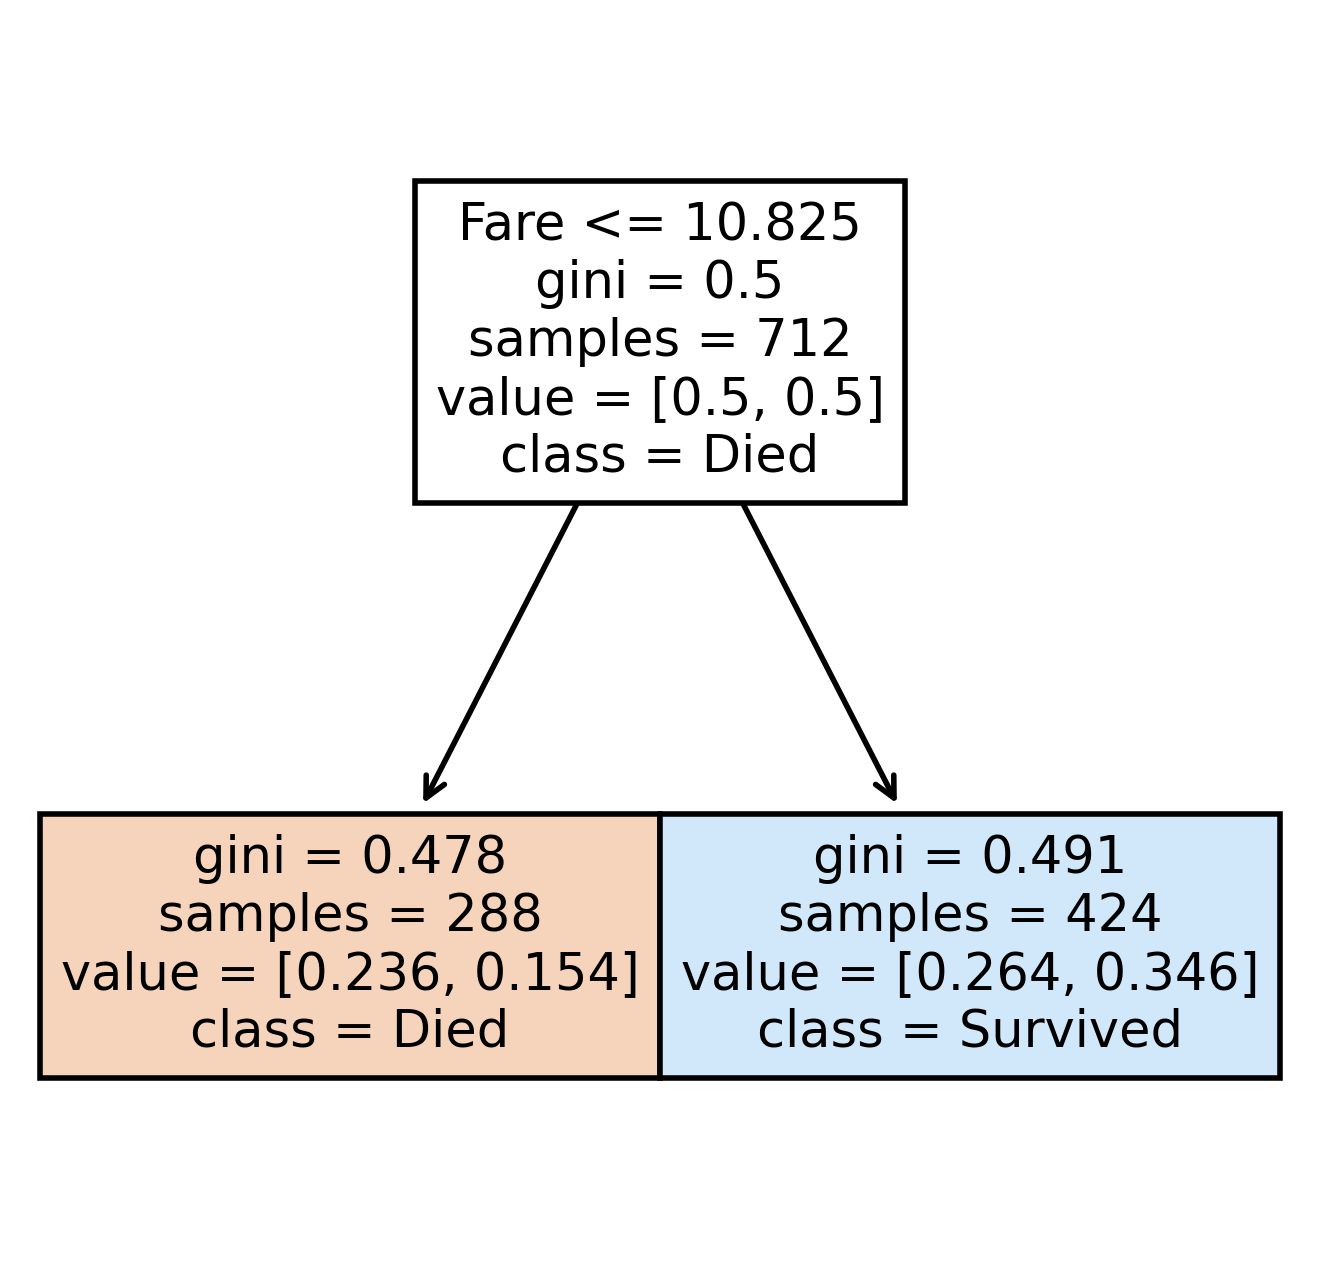

In [78]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=400)
tree.plot_tree(model_adb.estimators_[3],
               feature_names = titanic.columns[:-1].values, 
               class_names=titanic.iloc[:, -1].values,
               filled = True);
fig.savefig('titanic_ada_individualtree.png')

In [79]:


titanic = pd.read_csv('titanic_train.csv')
titanic.drop(['Name'], 1, inplace=True)
titanic.fillna(0, inplace=True)
titanic = titanic.rename(columns={'Survived': 'Decision'})
columns_titles = ["PassengerId","Pclass", "Sex", "Age", "SibSp", "Parch", "Ticket","Fare", "Cabin" ,"Embarked", "Decision"]
titanic=titanic.reindex(columns=columns_titles)

columns = titanic.columns[:-1].values
import numpy as np
for column in columns:
    if titanic[column].dtype != np.int64 and titanic[column].dtype != np.float64:
        titanic[column] = pd.factorize(titanic[column])[0]
        
from sklearn.model_selection import train_test_split
x_train_tit, x_test_tit, y_train, y_test = train_test_split(titanic.drop(['Decision'], axis=1), titanic["Decision"], test_size=0.20)

In [128]:
start = time.time()
clf = MSIDecisionTreeClassifier()
clf.fit(x_train_tit, y_train)
total_time = time.time() - start
print(total_time)

0.20333504676818848


In [81]:
clf.predict(x_test_tit)

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [82]:
y_test.values

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1], dtype=int64)

In [83]:
sum(clf.predict(x_test_tit) == y_test.values)/len(y_test)

0.776536312849162

#  Wine Quality dataset

In [84]:
wine = pd.read_csv('wineQualityReds.csv')
wine = wine.rename(columns={'quality': 'Decision'})
del wine['Unnamed: 0']
wine

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,Decision
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [85]:
wine.isnull().sum()

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Decision                0
dtype: int64

In [86]:
x_train_wine, x_test_wine, y_train_wine, y_test_wine = train_test_split(wine.drop(['Decision'], axis=1), wine["Decision"], test_size=0.20)

In [87]:
len(x_train_wine), len(x_test_wine)

(1279, 320)

In [88]:
train_wine = pd.concat([x_train_wine, y_train_wine], axis=1, join='inner')
test_wine = pd.concat([x_test_wine, y_test_wine], axis=1, join='inner')

In [89]:
train_wine['Decision'] = train_wine['Decision'].astype(str)
test_wine['Decision'] = test_wine['Decision'].astype(str)

In [90]:
for algorithm in algorithms:
    config = {'algorithm': algorithm}
    model = chef.fit(train_wine, config = config)
    good = 0
    for value in test_wine.values:
        prediction = chef.predict(model, param=value[:~0])
        if prediction == value[~0]:
            good += 1
    accuracy = good/len(test_wine)
    print(f"Accuracy for {algorithm} = {accuracy}")

ID3  tree is going to be built...
-------------------------
finished in  154.86498308181763  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  81.70445660672401 % on  1279  instances
Labels:  ['5' '6' '4' '7' '3' '8']
Confusion matrix:  [[444, 78, 3, 5, 0, 0], [80, 427, 7, 28, 0, 3], [0, 0, 34, 0, 0, 0], [5, 22, 0, 123, 0, 2], [0, 0, 0, 0, 8, 0], [0, 0, 0, 1, 0, 9]]
Decision  5  => Accuray:  86.6302 %, Precision:  83.7736 %, Recall:  83.9319 %, F1:  83.8527 %
Decision  6  => Accuray:  82.9554 %, Precision:  78.3486 %, Recall:  81.0247 %, F1:  79.6642 %
Decision  4  => Accuray:  99.2181 %, Precision:  100.0 %, Recall:  77.2727 %, F1:  87.1795 %
Decision  7  => Accuray:  95.0743 %, Precision:  80.9211 %, Recall:  78.3439 %, F1:  79.6116 %
Decision  3  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  8  => Accuray:  99.5309 %, Precision:  90.0 %, Recall:  64.2857 %, F1:  75.0 %
Accuracy for ID3 = 0.565625
C4.5  tr

In [91]:
y_test_wine = y_test_wine - y_test_wine.min().min()
y_train_wine = y_train_wine - y_train_wine.min()


In [92]:
start=time.time()
clf = MSIDecisionTreeClassifier()
clf.fit(x_train_wine, y_train_wine)
clf.predict(x_test_wine)
total_time = time.time() - start
print(total_time)


0.6550014019012451


In [93]:
sum(clf.predict(x_test_wine) == y_test_wine)/len(y_test_wine)

0.609375

In [94]:
wine_dec = pd.read_csv('wineQualityReds.csv')
wine_dec = wine_dec.rename(columns={'quality': 'Decision'})
del wine_dec['Unnamed: 0']
wine_dec

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,Decision
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [95]:
wine_dec['Decision'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [96]:
wine_dec['Decision'] = wine_dec.Decision.replace(to_replace=[5, 6, 7, 4, 8, 3], value=['five', 'six', 'seven', 'four', 'eight', 'three'])

In [97]:
wine_dec

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,Decision
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,five
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,five
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,five
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,six
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,five
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,five
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,six
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,six
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,five


In [98]:
titanic.to_csv('WINE.csv', encoding='utf-8')

In [99]:
x_train_wine_dec, x_test_wine_dec, y_train_wine_dec, y_test_wine_dec = train_test_split(wine_dec.drop(['Decision'], axis=1), wine_dec["Decision"], test_size=0.20)
len(x_train_wine_dec), len(x_test_wine_dec)

(1279, 320)

In [100]:
start=time.time()
dec_winedec = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model_tree = dec_winedec.fit(x_train_wine_dec, y_train_wine_dec)
y_pred_winedec = model_tree.predict(x_test_wine_dec)
total_time = time.time() - start
print("DecisionTree Classifier Model Accuracy for entropy criterion:", accuracy_score(y_test_wine_dec, y_pred_winedec))
print(total_time)

DecisionTree Classifier Model Accuracy for entropy criterion: 0.546875
0.015587806701660156


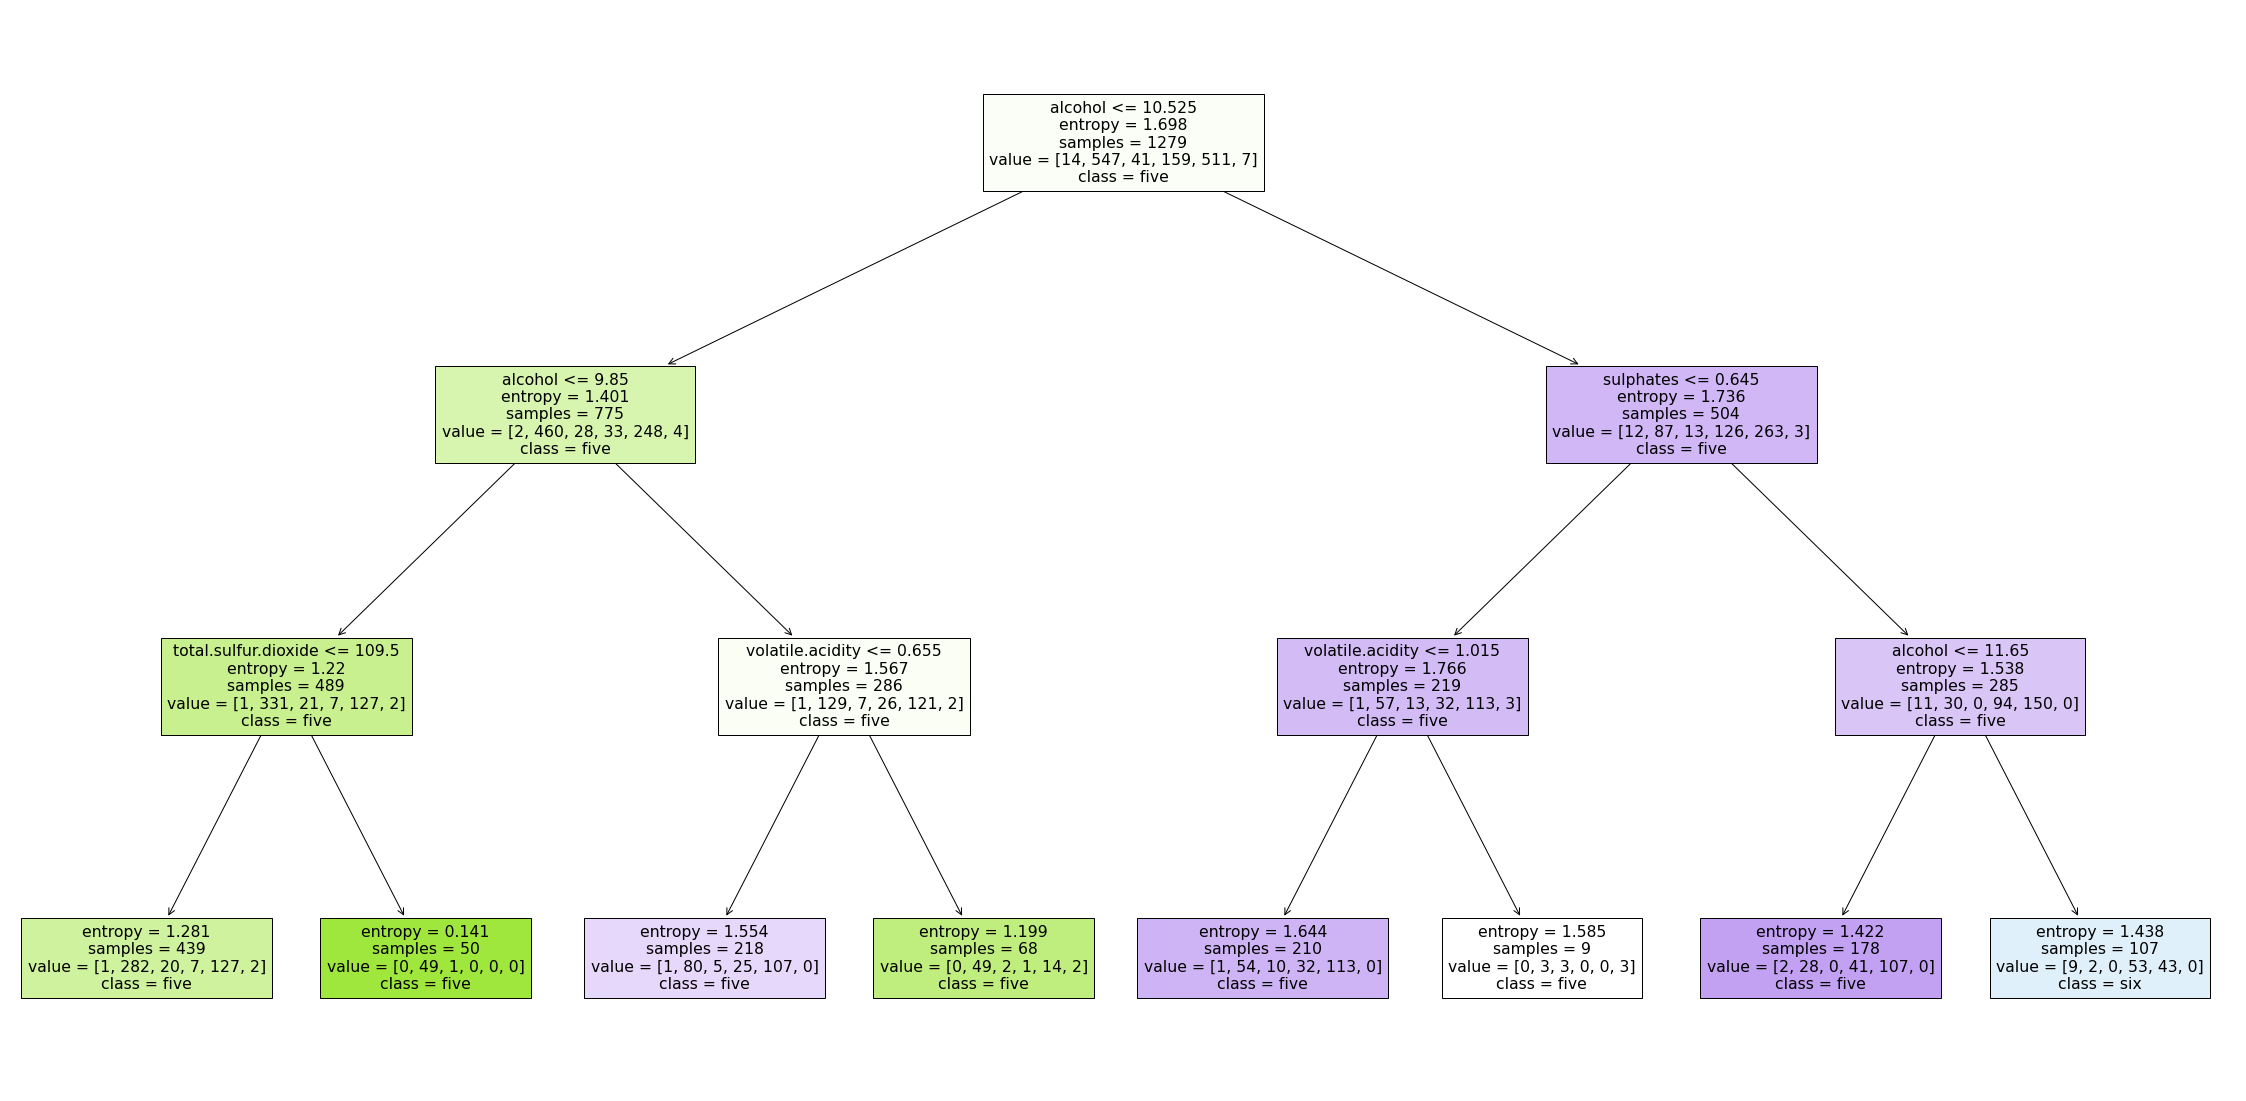

In [101]:
fig = plt.figure(figsize=(40,20))
tree.plot_tree(dec_winedec, feature_names=wine_dec.columns[:-1].values,  
                   class_names=wine_dec.iloc[:, -1].values,
                   filled=True)
fig.savefig("decistion_tree_winedec_entropy.png")

In [102]:
start=time.time()
dec_winedec = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_tree = dec_winedec.fit(x_train_wine_dec, y_train_wine_dec)
y_pred_winedec = model_tree.predict(x_test_wine_dec)
total_time = time.time() - start
print("DecisionTree Classifier Model Accuracy for gini criterion:", accuracy_score(y_test_wine_dec, y_pred_winedec))
print(total_time)

DecisionTree Classifier Model Accuracy for gini criterion: 0.5375
0.009972572326660156


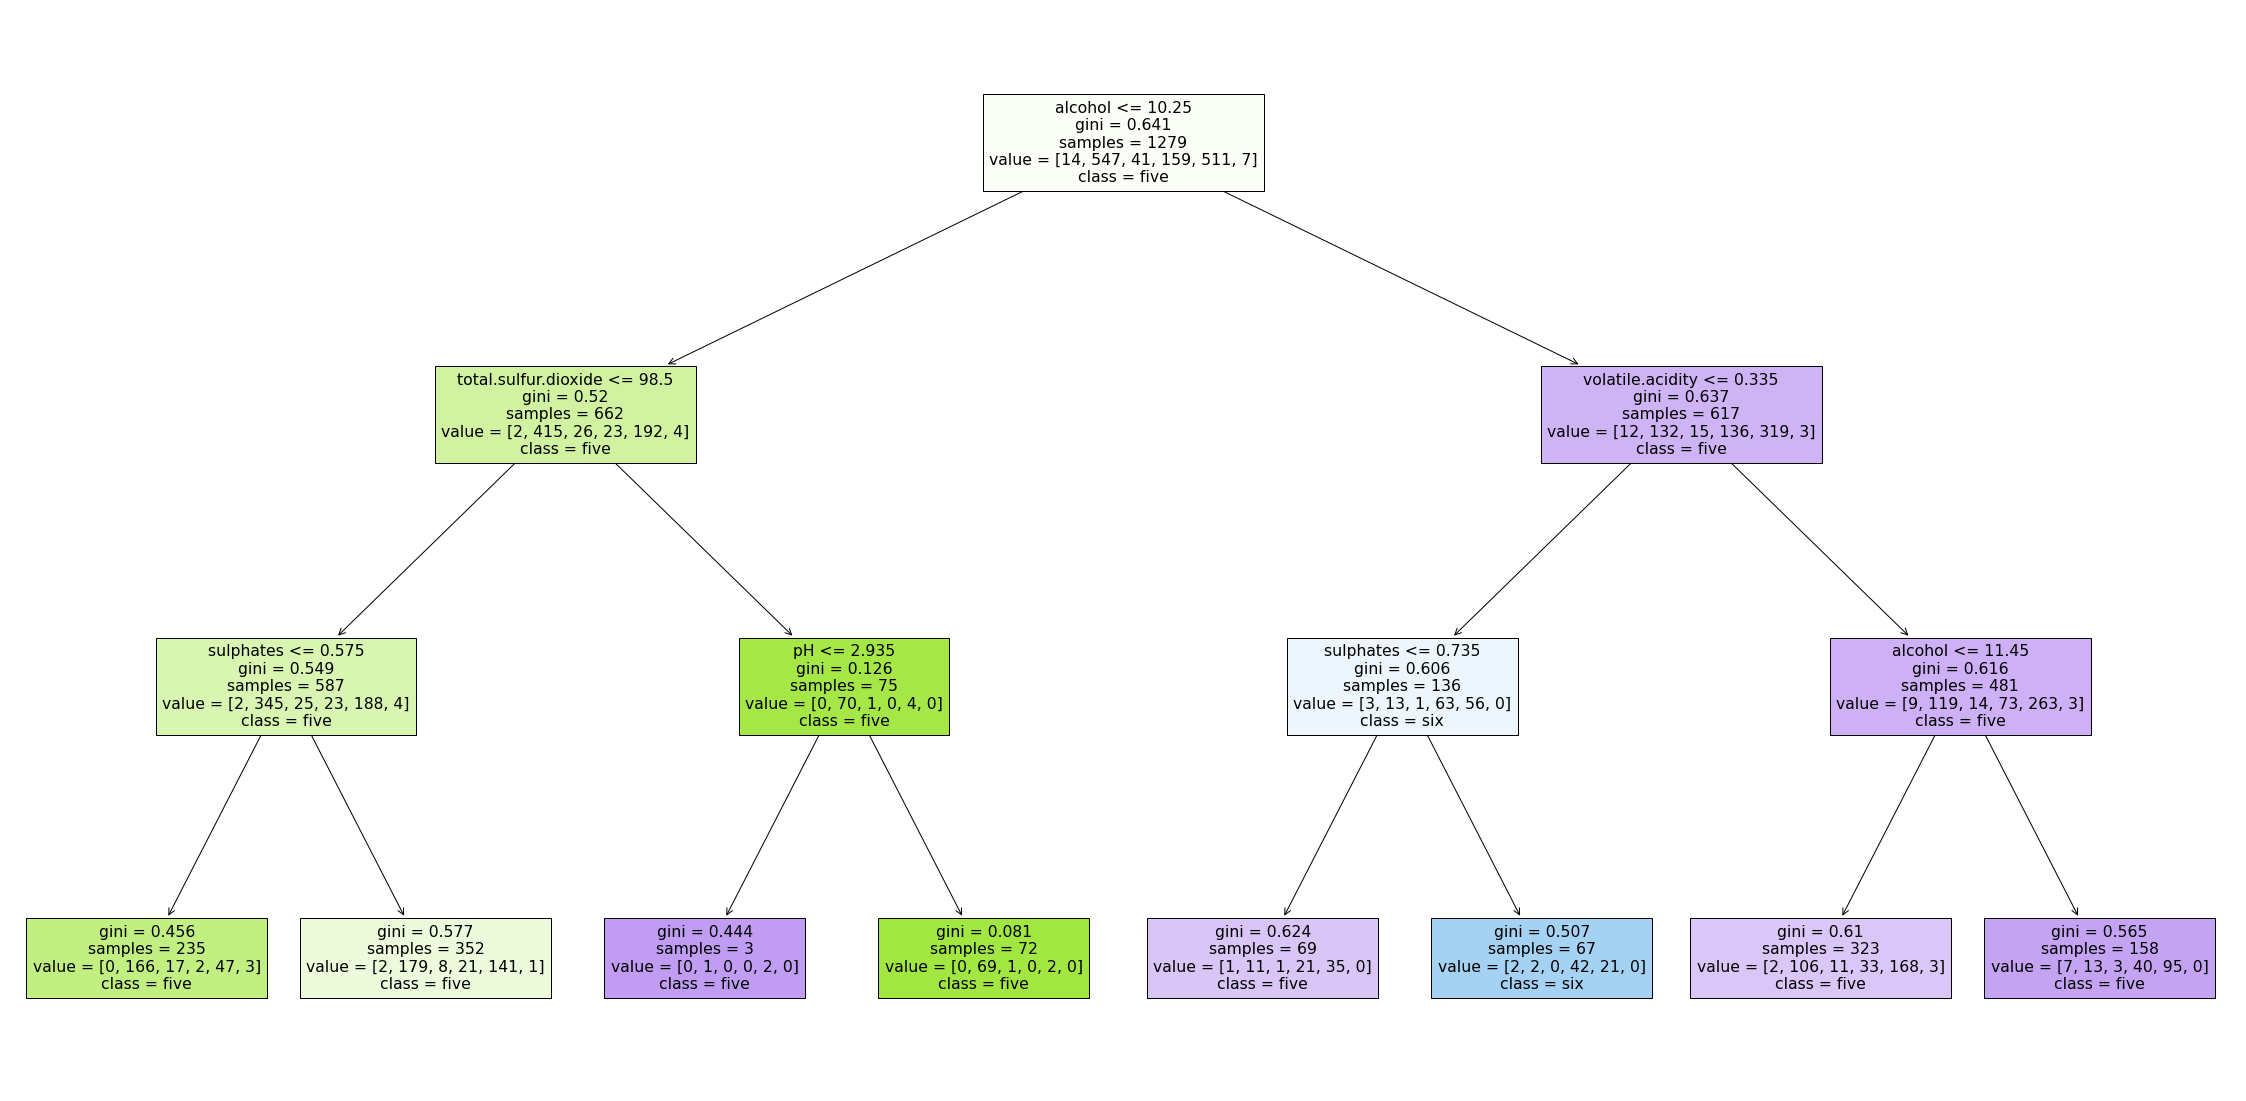

In [103]:
fig = plt.figure(figsize=(40,20))
tree.plot_tree(dec_winedec, feature_names=wine_dec.columns[:-1].values,  
                   class_names=wine_dec.iloc[:, -1].values,
                   filled=True)
fig.savefig("decistion_tree_winedec_gini.png")

In [104]:
start=time.time()
clf_wine=RandomForestClassifier(max_depth=3, n_estimators=100)
clf_wine.fit(x_train_wine_dec,y_train_wine_dec)
y_pred_wine=clf_wine.predict(x_test_wine_dec)
total_time = time.time() - start
print("Accuracy for RandomForestClassifier:", accuracy_score(y_test_wine_dec, y_pred_wine))
print(total_time)

Accuracy for RandomForestClassifier: 0.553125
0.22690129280090332


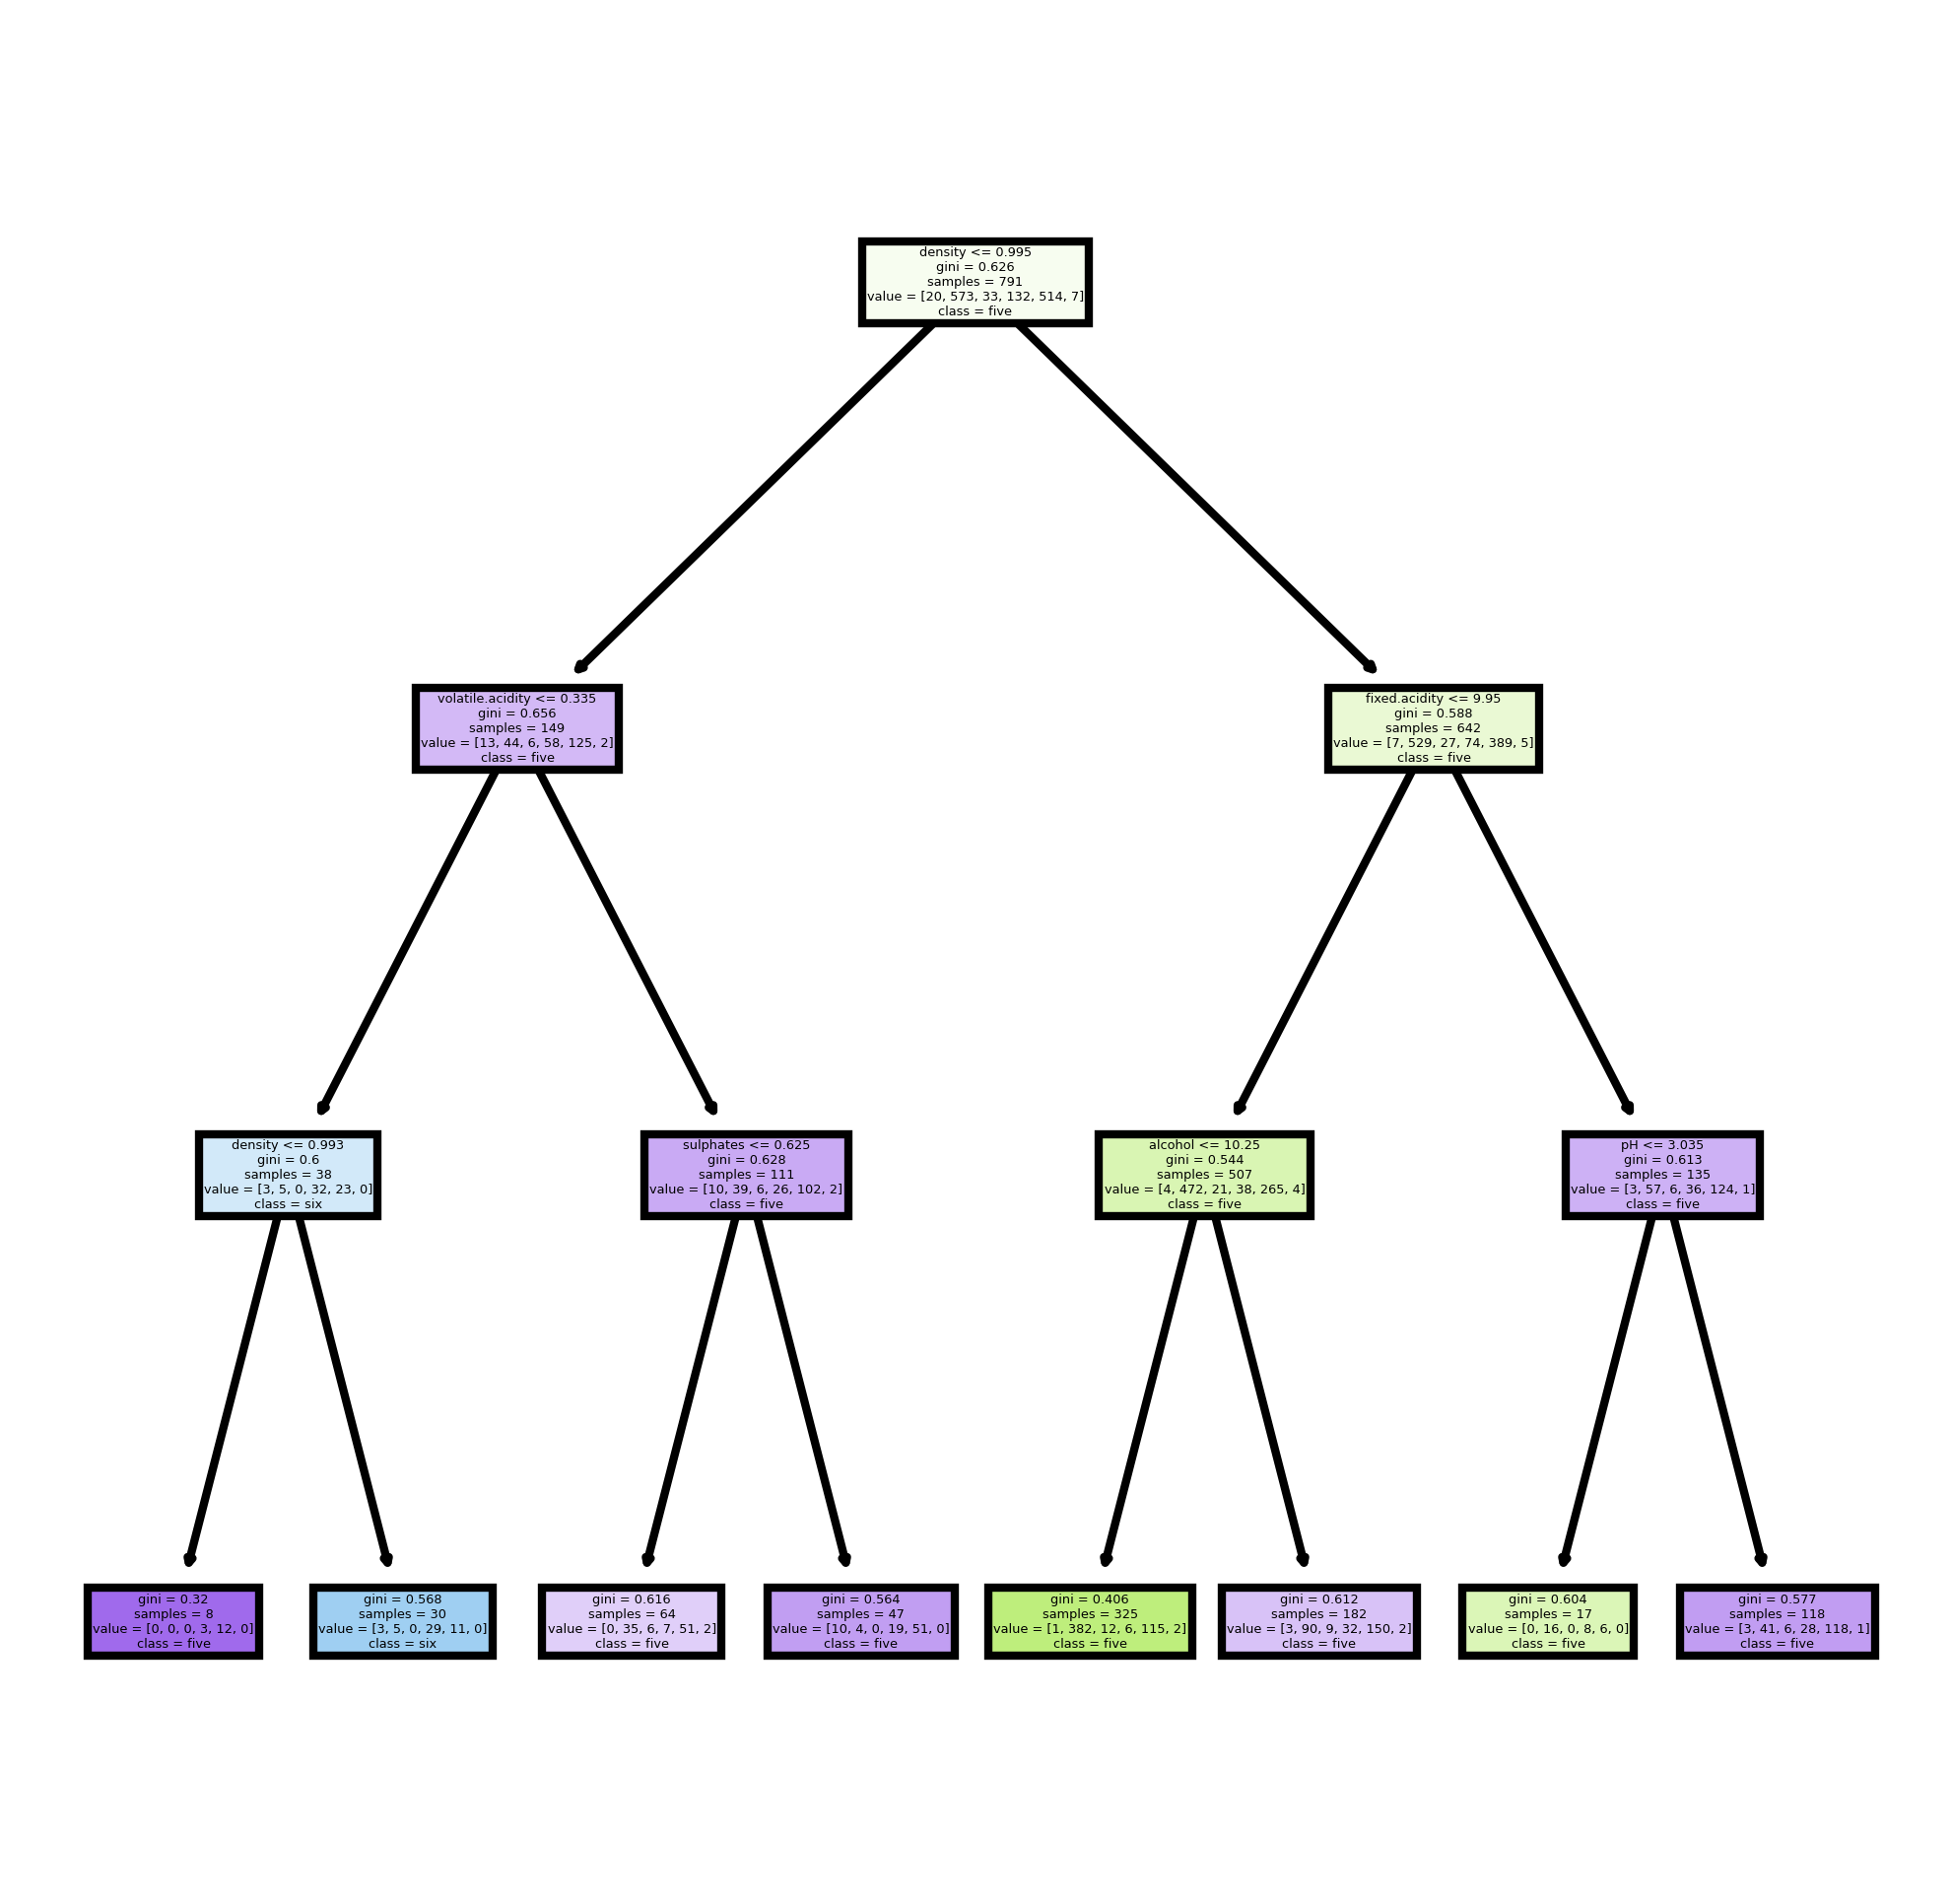

In [105]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=600)
tree.plot_tree(clf_wine.estimators_[3],
               feature_names = wine_dec.columns[:-1].values, 
               class_names=wine_dec.iloc[:, -1].values,
               filled = True);
fig.savefig('wine_individualtree.png')

In [106]:
start=time.time()
adb = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)
model_adb = adb.fit(x_train_wine, y_train_wine)
y_pred_wine = model_adb.predict(x_test_wine)
total_time=time.time()-start
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test_wine, y_pred_wine))
print(total_time)


AdaBoost Classifier Model Accuracy: 0.615625
0.1693432331085205


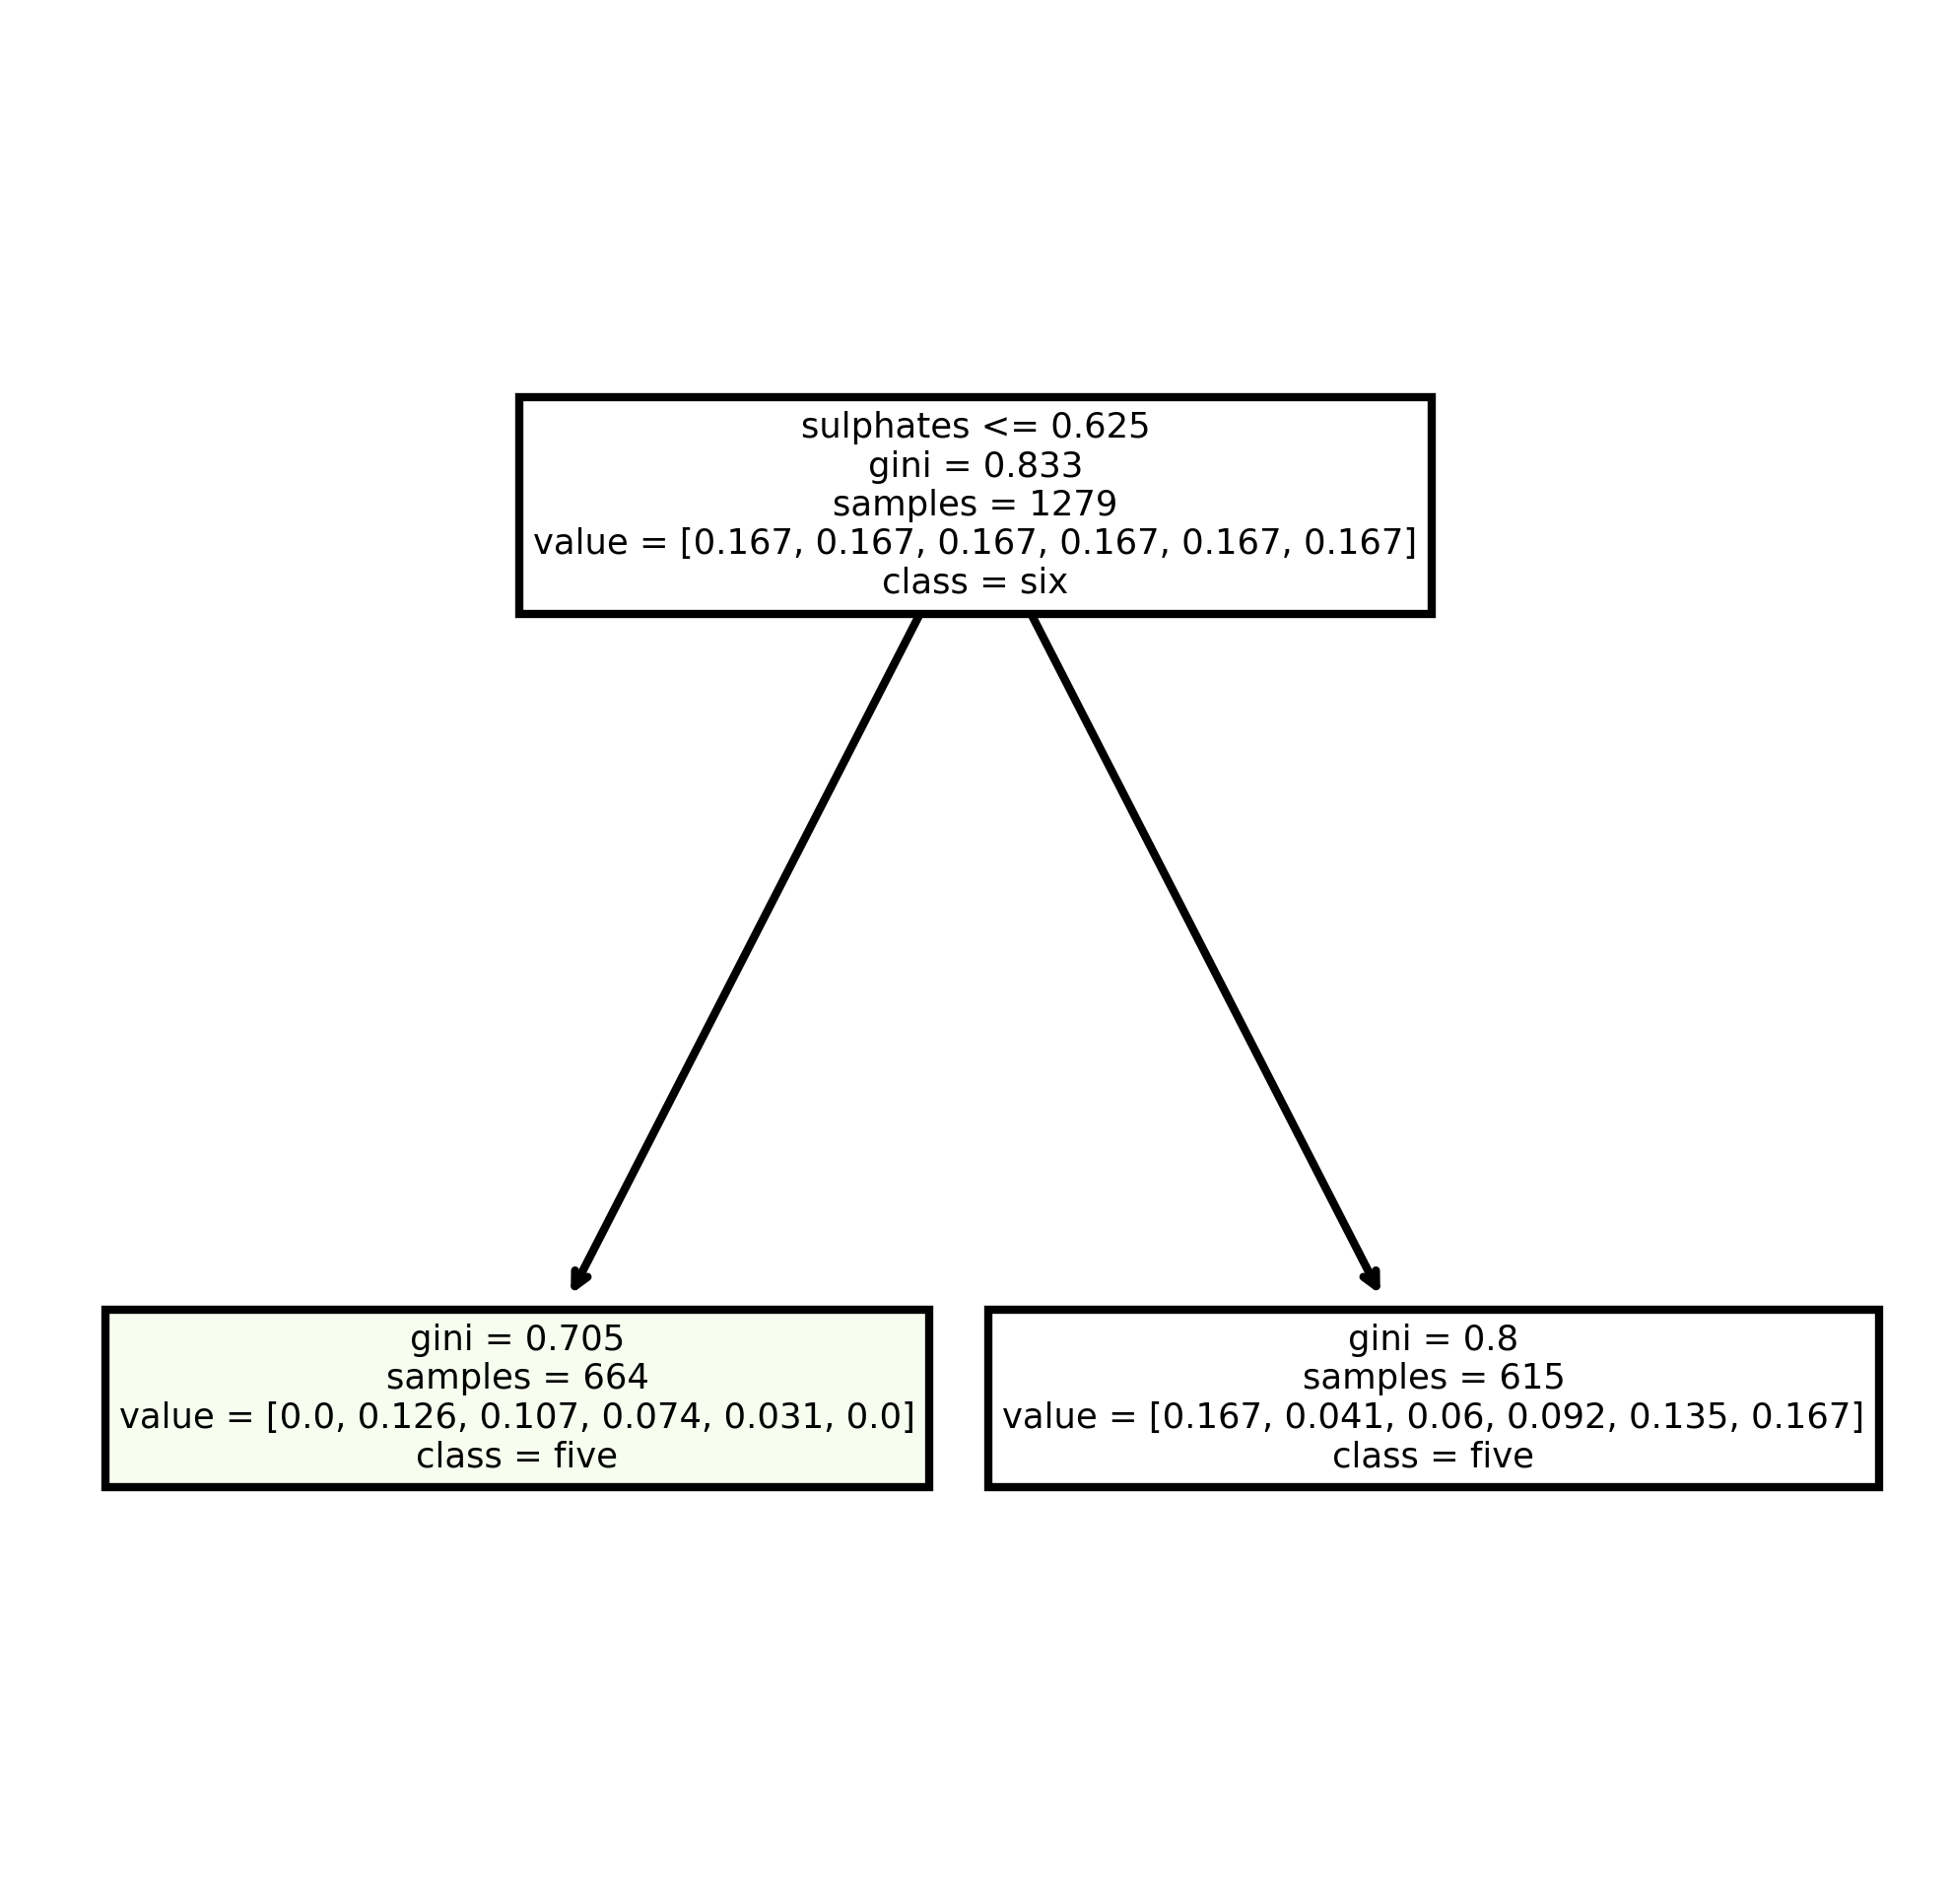

In [107]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=600)
tree.plot_tree(model_adb.estimators_[3],
               feature_names = wine_dec.columns[:-1].values, 
               class_names=wine_dec.iloc[:, -1].values,
               filled = True);
fig.savefig('wine_ada_individualtree.png')

# Car evaluation dataset

In [108]:
car = pd.read_csv('car_evaluation.csv')
car.columns = ["buying", "maintenance", "no_doors", "no_persons", "luggage_boot", "safety", "Decision"]
car

,buying,maintenance,no_doors,no_persons,luggage_boot,safety,Decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [109]:
x_train_car, x_test_car, y_train_car, y_test_car = train_test_split(car.drop(['Decision'], axis=1), car["Decision"], test_size=0.20)
len(x_train_car), len(x_test_car)

(1381, 346)

In [110]:
train_car = pd.concat([x_train_car, y_train_car], axis=1, join='inner')
test_car = pd.concat([x_test_car, y_test_car], axis=1, join='inner')

In [111]:
for algorithm in algorithms:
    config = {'algorithm': algorithm}
    model = chef.fit(train_car, config = config)
    good = 0
    for value in test_car.values:
        prediction = chef.predict(model, param=value[:~0])
        if prediction == value[~0]:
            good += 1
    accuracy = good/len(test_car)
    print(f"Accuracy for {algorithm} = {accuracy}")

ID3  tree is going to be built...
-------------------------
finished in  21.955812692642212  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  100.0 % on  1381  instances
Labels:  ['unacc' 'vgood' 'acc' 'good']
Confusion matrix:  [[954, 0, 0, 0], [0, 57, 0, 0], [0, 0, 317, 0], [0, 0, 0, 53]]
Decision  unacc  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  vgood  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  acc  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  good  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Accuracy for ID3 = 0.930635838150289
C4.5  tree is going to be built...
-------------------------
finished in  23.80260682106018  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  100.0 % on  1381  instances
Labels:  ['unacc' 'vgood' 'acc' 'good']
Confusion matrix

In [112]:
columns_car = car.columns[:-1].values
for column in columns_car:
    if car[column].dtype != np.int64 and car[column].dtype != np.float64:
        car[column] = pd.factorize(car[column])[0]

In [113]:
x_train_car, x_test_car, y_train_car, y_test_car = train_test_split(car.drop(['Decision'], axis=1), car["Decision"], test_size=0.20)
len(x_train_car), len(x_test_car)

(1381, 346)

In [114]:
from sklearn.tree import DecisionTreeClassifier 
start=time.time()
dec_tree = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_tree = dec_tree.fit(x_train_car, y_train_car)
y_pred_car_dec = model_tree.predict(x_test_car)
total_time = time.time() - start
print("DecisionTree Classifier Model Accuracy for gini criterion:", accuracy_score(y_test_car, y_pred_car_dec))
print(total_time)

DecisionTree Classifier Model Accuracy for gini criterion: 0.7947976878612717
0.00698089599609375


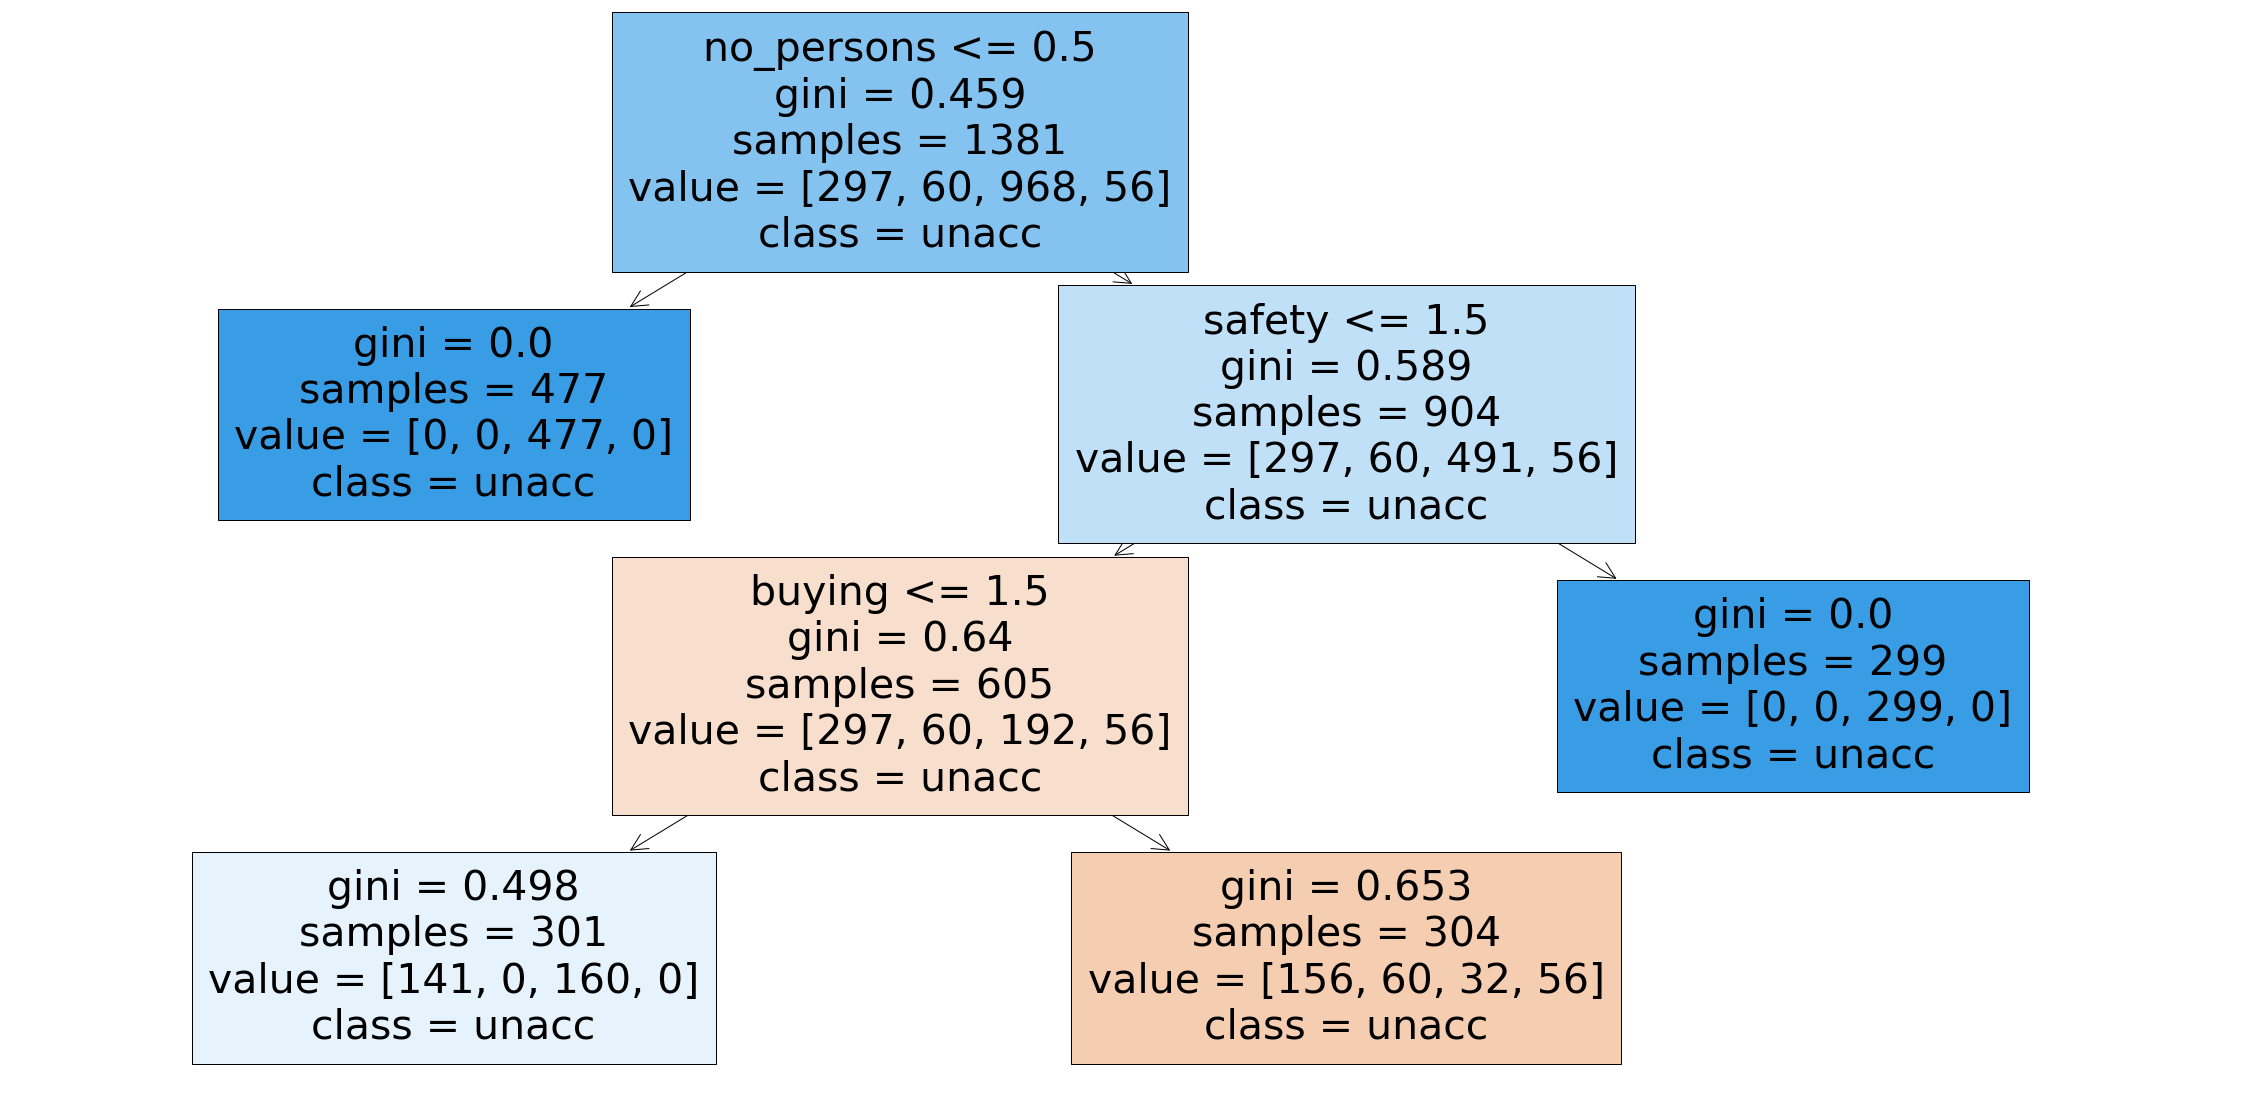

In [115]:
fig = plt.figure(figsize=(40,20))
tree.plot_tree(dec_tree, feature_names=car.columns[:-1],  
                   class_names=car.iloc[:, -1].values,
                   filled=True)
fig.savefig("decistion_tree_car_gini.png")

In [116]:
start=time.time()
dec_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model_tree = dec_tree.fit(x_train_car, y_train_car)
y_pred_car_dec = model_tree.predict(x_test_car)
total_time = time.time() - start
print("DecisionTree Classifier Model Accuracy for entropy criterion:", accuracy_score(y_test_car, y_pred_car_dec))
print(total_time)

DecisionTree Classifier Model Accuracy for entropy criterion: 0.7947976878612717
0.007977962493896484


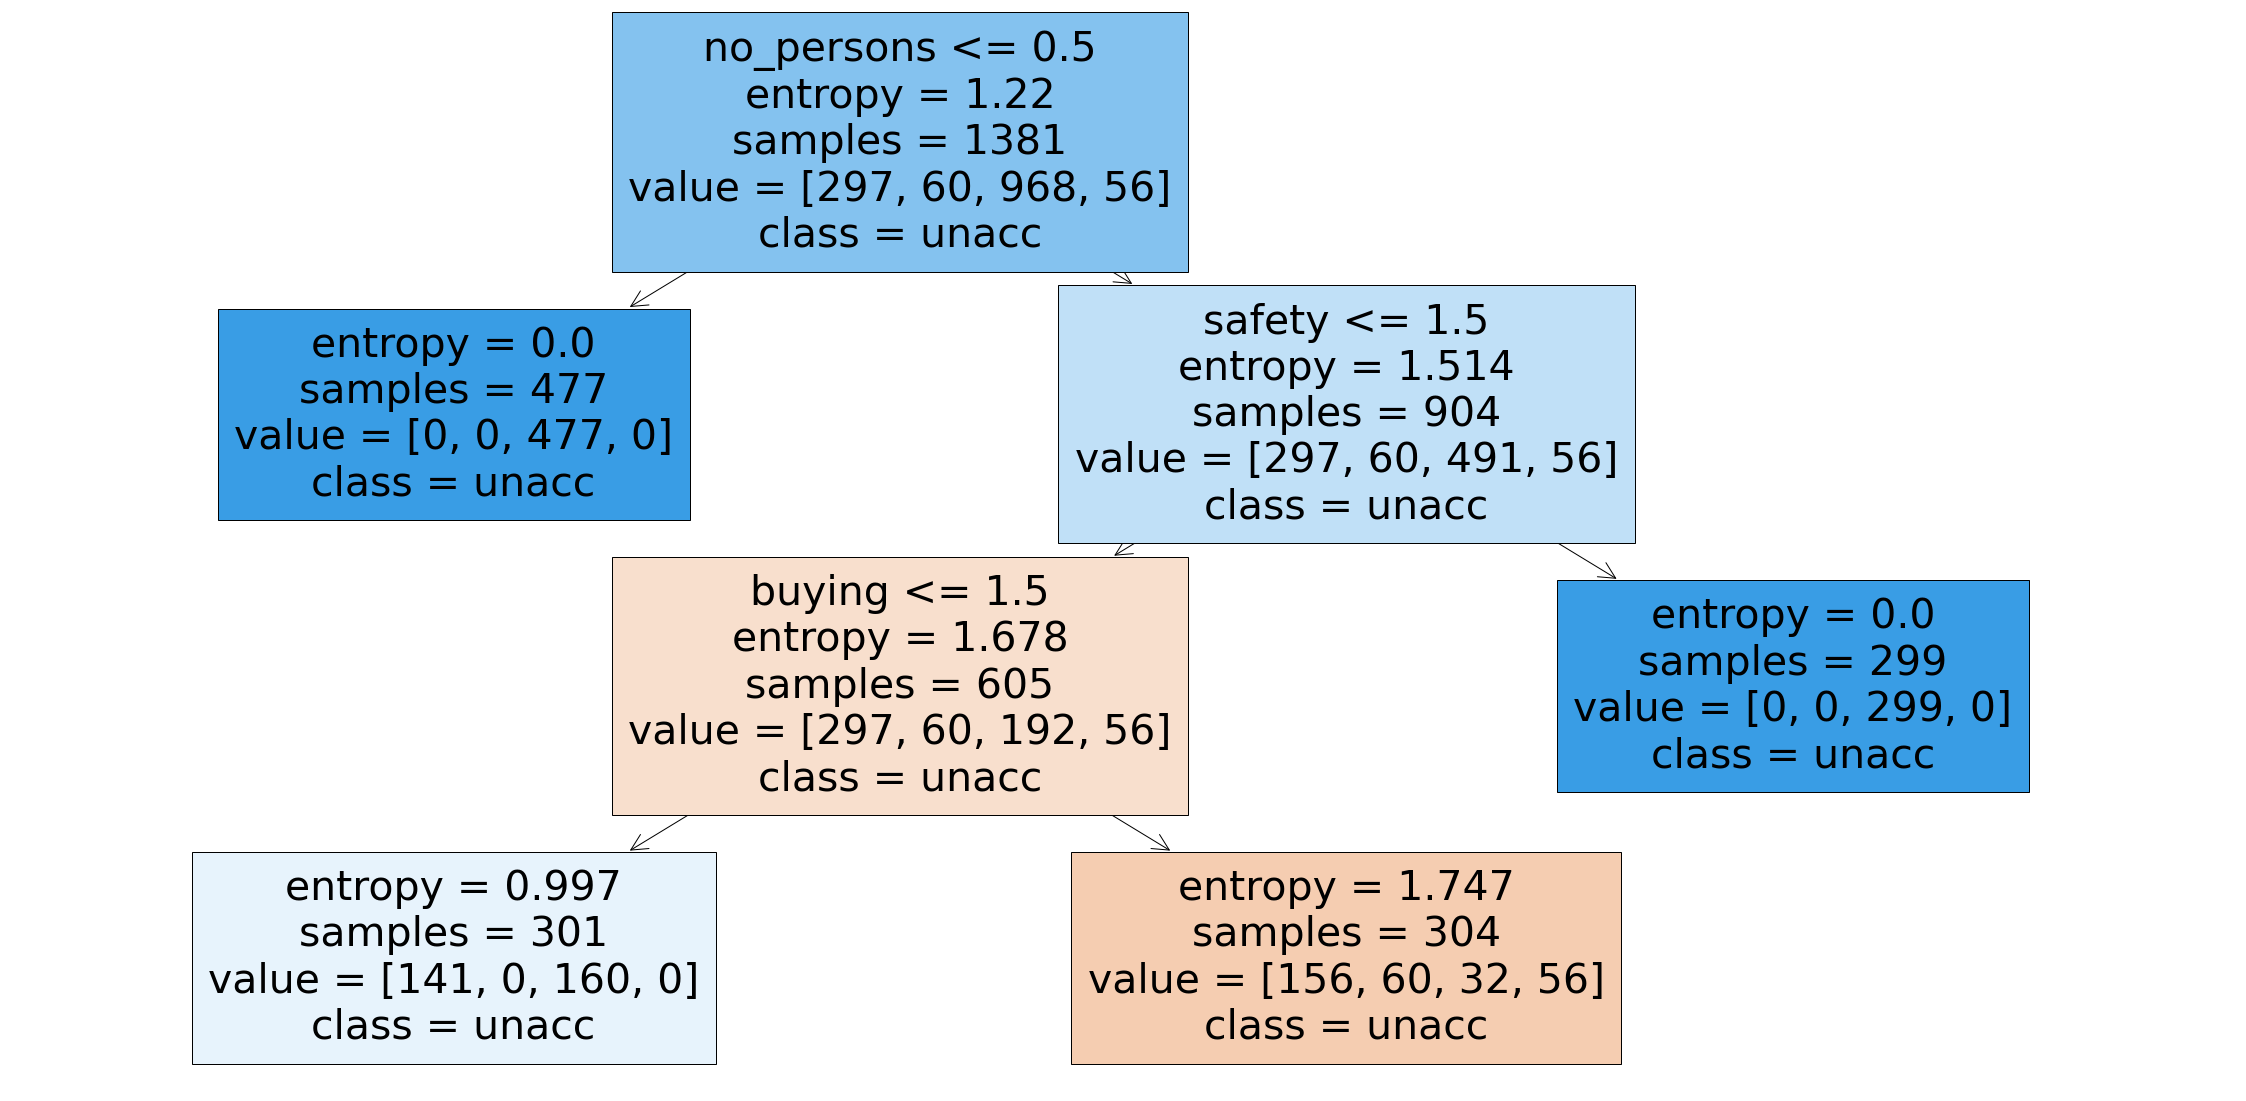

In [117]:
fig = plt.figure(figsize=(40,20))
tree.plot_tree(dec_tree, feature_names=car.columns[:-1],  
                   class_names=car.iloc[:, -1].values,
                   filled=True)
fig.savefig("decistion_tree_car_entropy.png")

In [118]:
start=time.time()
clf_car=RandomForestClassifier(max_depth=3, n_estimators=100)
clf_car.fit(x_train_car,y_train_car)
y_pred_car=clf_car.predict(x_test_car)
total_time = time.time() - start
print("Accuracy for RandomForestClassifier:", accuracy_score(y_test_car, y_pred_car))
print(total_time)


Accuracy for RandomForestClassifier: 0.7890173410404624
0.2214064598083496


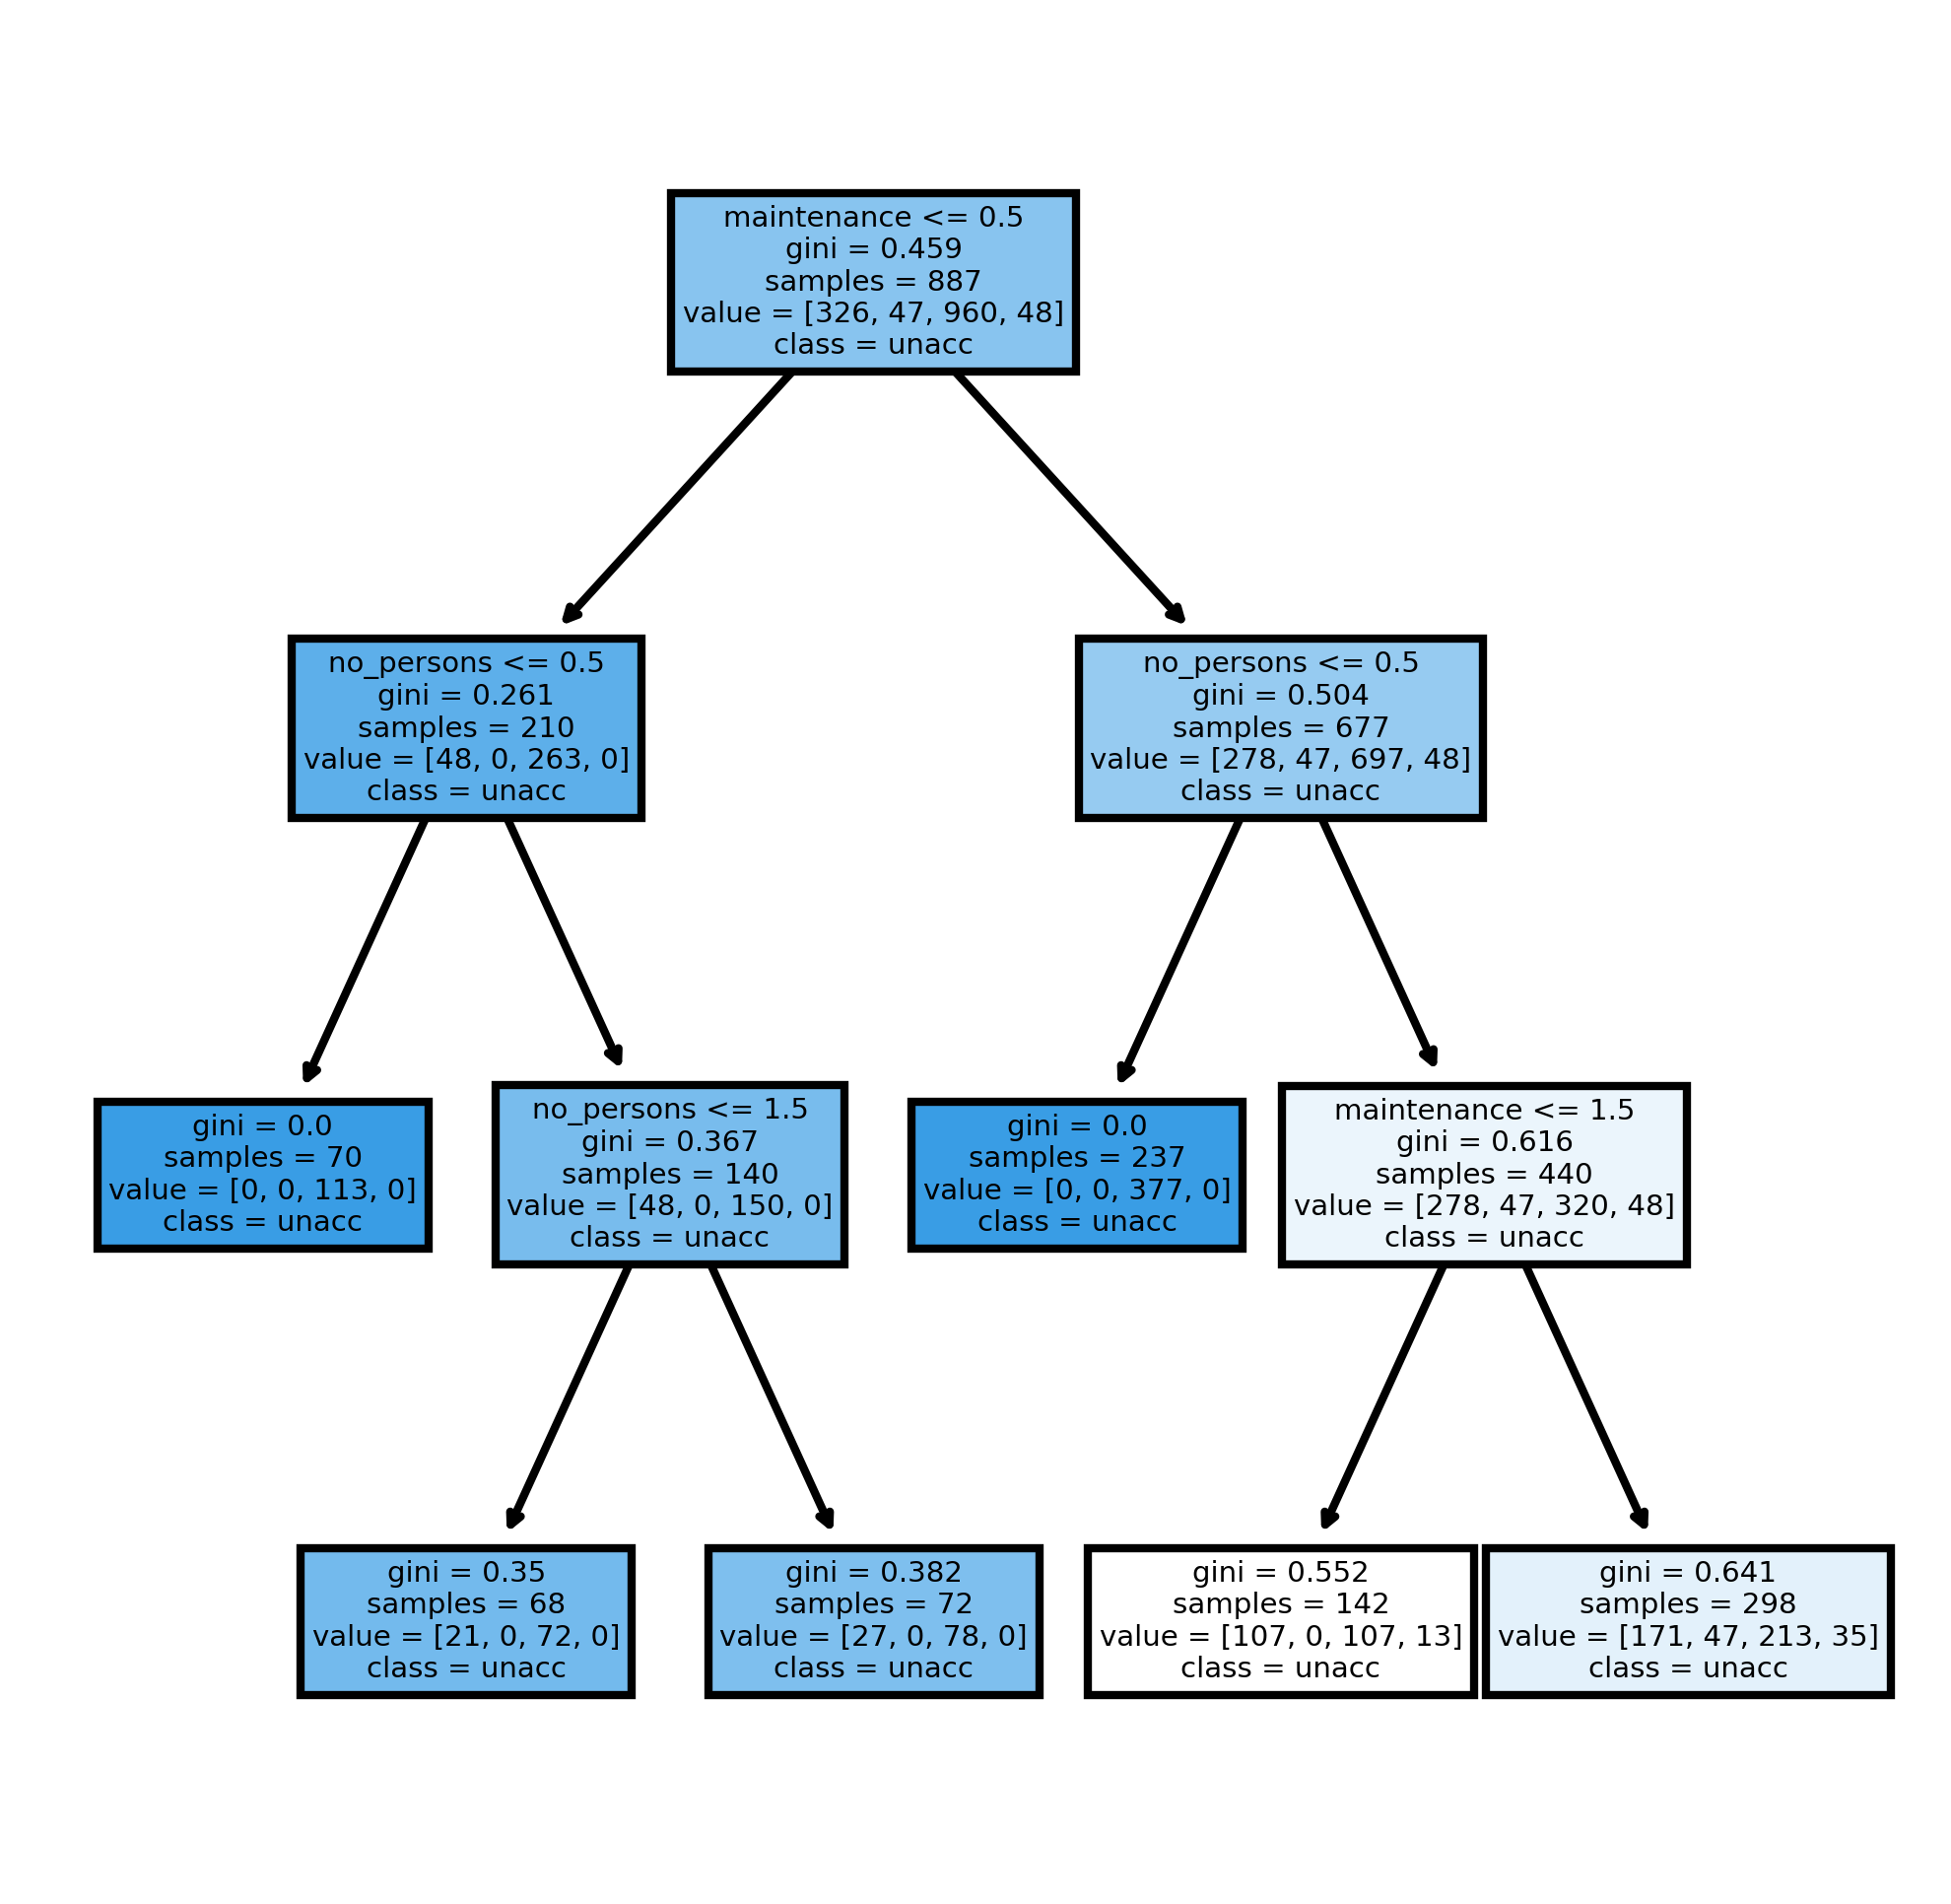

In [119]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=600)
tree.plot_tree(clf_car.estimators_[3],
               feature_names = car.columns[:-1].values, 
               class_names=car.iloc[:, -1].values,
               filled = True);
fig.savefig('car_individualtree.png')

In [130]:
start=time.time()
adb = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)
model_adb = adb.fit(x_train_car, y_train_car)
y_pred_car = model_adb.predict(x_test_car)
total_time = time.time() - start

print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test_car, y_pred_car))
print(total_time)


AdaBoost Classifier Model Accuracy: 0.8670520231213873
0.1356372833251953


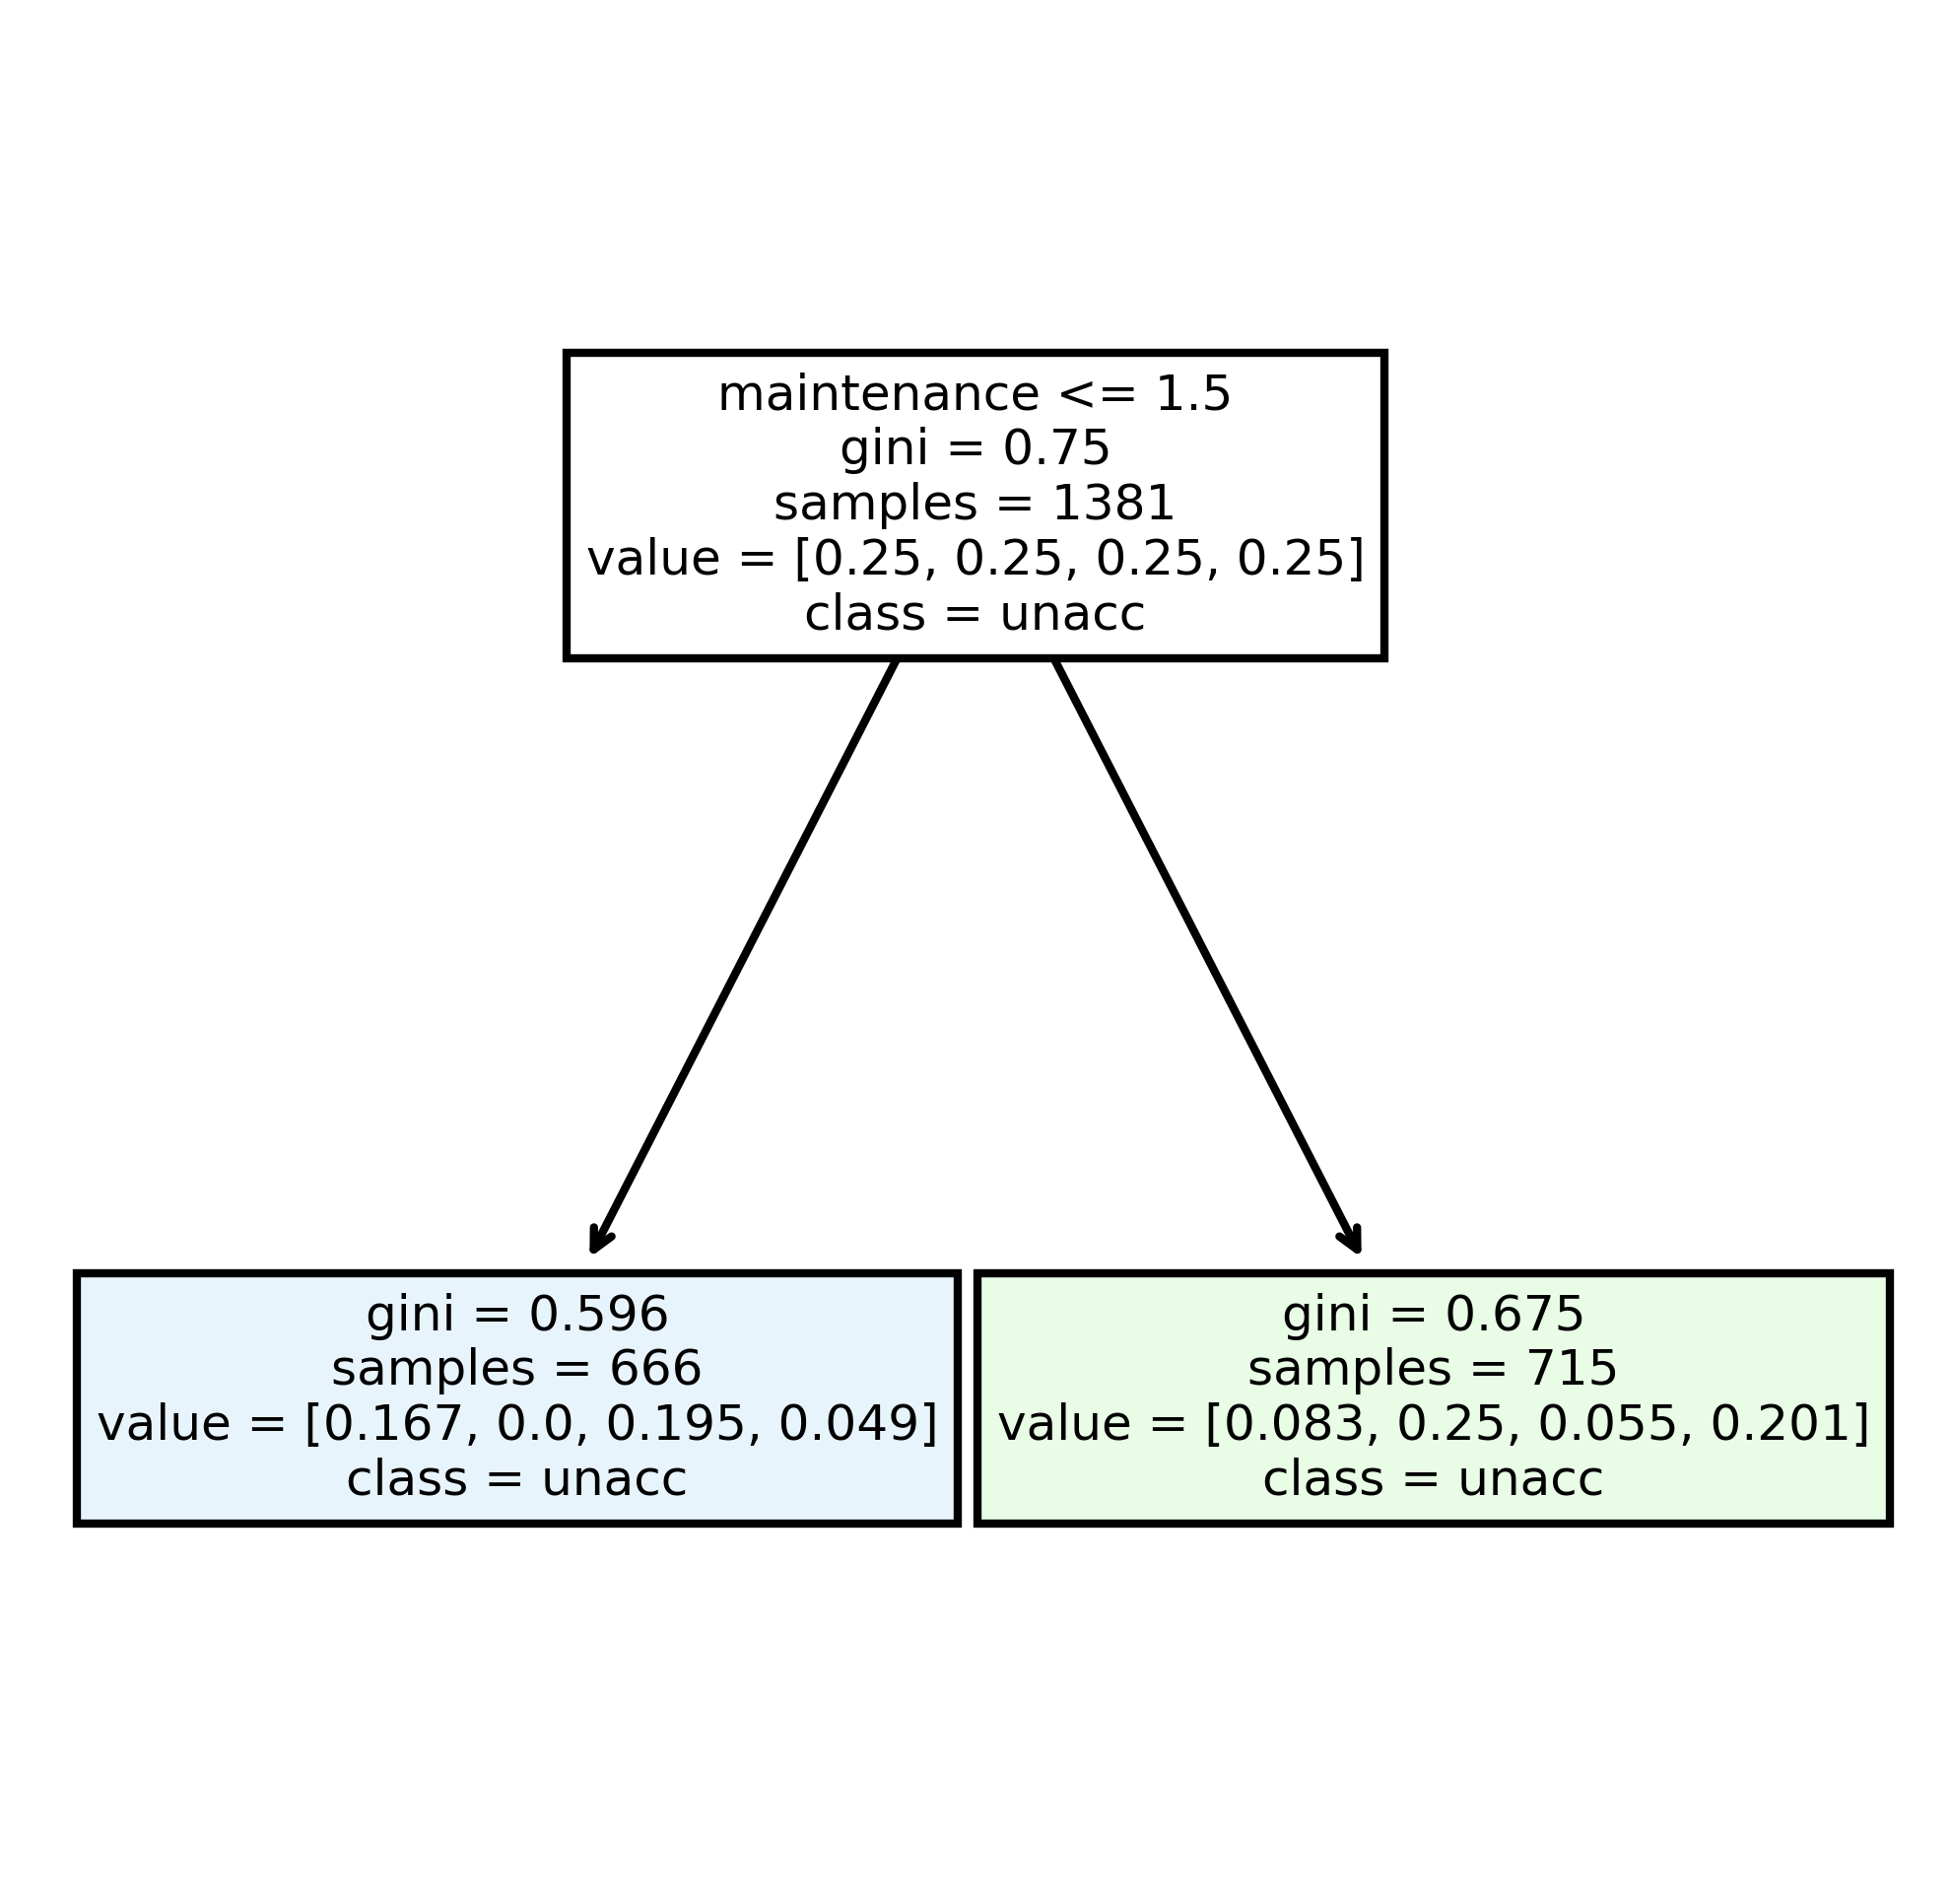

In [121]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=600)
tree.plot_tree(model_adb.estimators_[3],
               feature_names = car.columns[:-1].values, 
               class_names=car.iloc[:, -1].values,
               filled = True);
fig.savefig('car_ada_individualtree.png')

In [122]:
car.Decision[car.Decision == 'unacc'] = 0
car.Decision[car.Decision == 'good'] = 1
car.Decision[car.Decision == 'acc' ] = 2
car.Decision[car.Decision == 'vgood'] = 3
car


,buying,maintenance,no_doors,no_persons,luggage_boot,safety,Decision
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,1,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...
1722,3,3,3,2,1,0,1
1723,3,3,3,2,1,1,3
1724,3,3,3,2,2,2,0
1725,3,3,3,2,2,0,1


In [123]:
car

,buying,maintenance,no_doors,no_persons,luggage_boot,safety,Decision
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,1,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...
1722,3,3,3,2,1,0,1
1723,3,3,3,2,1,1,3
1724,3,3,3,2,2,2,0
1725,3,3,3,2,2,0,1


In [124]:
car.columns[:-1]

Index(['buying', 'maintenance', 'no_doors', 'no_persons', 'luggage_boot',
       'safety'],
      dtype='object')

In [125]:
columns_car = car.columns.values
for column in columns_car:
    if car[column].dtype != np.int64 and car[column].dtype != np.float64:
        car[column] = pd.factorize(car[column])[0]

In [126]:
x_train_car, x_test_car, y_train_car, y_test_car = train_test_split(car.drop(['Decision'], axis=1), car["Decision"], test_size=0.20)
len(x_train_car), len(x_test_car)

(1381, 346)

In [131]:
start=time.time()
clf = MSIDecisionTreeClassifier()
clf.fit(x_train_car, y_train_car)
clf.predict(x_test_car)
total_time = time.time() - start
print(total_time)

0.11868405342102051


In [105]:
sum(clf.predict(x_test_car) == y_test_car)/len(y_test_car)


0.7716763005780347